# Final Project -- Glassdoor Job Reviews

##  Group 2 : Andrew Leong, Benson Chen, Lotus Liu, Jay Zhu, Naomi Wong


# Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn as sk
import sklearn.tree as tree

from IPython.display import Image  
import pydotplus
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%autosave 400

Autosaving every 400 seconds


In [4]:
df = pd.read_csv("glassdoor_reviews.csv", index_col=0)

# 1. Data Description

The dataset contains company reviews left on the job search platform Glassdoor with 838566 rows and 20 columns. Each row correspinds to a employee review.

#### Columns:
<ol>
<li><b>column label</b>: column identifiers (N/A - not relevant to dataset)
<li><b>firm</b>: firm that is reviewed
<li><b>date_review</b>: date of the review
<li><b>job title</b>: job title of the reviewer
<li><b>current</b>: current status of the employee (former or current)
<li><b>location</b>: job location (Hong Kong, New York, England, London)
<li><b>overall rating</b>: overall rating of the firm (scale of 1 to 5)
<li><b>work_life_balance</b>: worklife balance rating (scale of 1 to 5)
<li><b>culture_values</b>: culture and values rating (scale of 1 to 5)
<li><b>diversity_inclusion</b>: diversity and inclusion rating (scale 1 to 5)
<li><b>career_opp</b>: career opportunities rating (scale 1 to 5)
<li><b>comp_benefits</b>: compensation and benefits rating (scale 1 to 5)
<li><b>senior_mgmt</b>: senior management rating (scale 1 to 5)
<li><b>recommend</b>: reviewer reccomendation (v - Positive, x - Negative, o - No opinion)
<li><b>ceo_approv</b>: reveiwer approval of the CEO (v - Positive, r - Mild, x - Negative, o - No opinion)
<li><b>outlook</b>: reviewer outlook of the firm (v - Positive, r - Mild, x - Negative, o - No opinion)
<li><b>headline</b>: headline of the review (string)
<li><b>pros</b>: pros (string)
<li><b>cons</b>: cons (string)
<li><b>use</b>: N/A - all null values
</ol>

# 2. Understanding the data 

In [5]:
# columns in the dataset
df.columns

Index(['column_label', 'firm', 'date_review', 'job_title', 'current',
       'location', 'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons',
       'use'],
      dtype='object')

In [6]:
# check the data shape and info
df.shape
df.info()

(838566, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838566 entries, 1 to 838566
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   column_label         838566 non-null  int64  
 1   firm                 838566 non-null  object 
 2   date_review          838566 non-null  object 
 3   job_title            838566 non-null  object 
 4   current              838566 non-null  object 
 5   location             541228 non-null  object 
 6   overall_rating       838566 non-null  int64  
 7   work_life_balance    688672 non-null  float64
 8   culture_values       647193 non-null  float64
 9   diversity_inclusion  136066 non-null  float64
 10  career_opp           691065 non-null  float64
 11  comp_benefits        688484 non-null  float64
 12  senior_mgmt          682690 non-null  float64
 13  recommend            838566 non-null  object 
 14  ceo_approv           838566 non-null  object 
 15  outlook          

In [7]:
# first few reviews of the dataset
df.head(3)

,column_label,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,use
1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,1.0,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,NaN
2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,4.0,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,NaN
3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,NaN


In [8]:
# check for null values
df.isna().sum()

column_label                0
firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
use                    838566
dtype: int64

In [9]:
# Check the variables
df.job_title.unique()
df.current.unique()
df['location'].unique()
df['overall_rating'].unique()
df['work_life_balance'].unique()
df.culture_values.unique()
df.diversity_inclusion.unique()
df.career_opp.unique()
df.comp_benefits.unique()
df.senior_mgmt.unique()
df.recommend.unique()
df.ceo_approv.unique()
df.outlook.unique()

array([' Financial Analyst', ' Administrator',
       ' Client Services Representative', ..., ' Senior Policy Analyst',
       ' Solution Architect Corporate IT', ' DASO Jobcentre'],
      dtype=object)

array(['Former Employee, more than 1 year', 'Former Employee',
       'Current Employee', 'Current Employee, less than 1 year',
       'Former Employee, less than 1 year',
       'Former Employee, more than 5 years',
       'Current Employee, more than 1 year',
       'Former Employee, more than 10 years',
       'Former Employee, more than 3 years',
       'Current Employee, more than 3 years',
       'Current Employee, more than 5 years',
       'Former Employee, more than 8 years',
       'Current Employee, more than 10 years',
       'Current Employee, more than 8 years',
       'Current Contractor, more than 1 year',
       'KEY NOT FOUND: jobLine.temporary-former',
       'KEY NOT FOUND: jobLine.per_diem-former',
       'Current Contractor, less than 1 year',
       'Current Freelancer, more than 3 years', 'Former Contractor',
       'Former Contractor, less than 1 year',
       'Former Intern, more than 1 year',
       'Former Contractor, more than 1 year',
       'Former Intern

array(['New York, NY', 'Hong Kong', 'London, England, England', ...,
       'Truro, VA', 'Fylde, England, England',
       'Bacolod, Bacolod, Bacolod'], dtype=object)

array([1, 4, 3, 5, 2])

array([ 1.,  4.,  5.,  2.,  3., nan])

array([ 1.,  5.,  4.,  2.,  3., nan])

array([ 1.,  4.,  3.,  2., nan,  5.])

array([ 1.,  3.,  5.,  2., nan,  4.])

array([ 2.,  4.,  3.,  1., nan,  5.])

array([ 1.,  4.,  5.,  3.,  2., nan])

array(['x', 'o', 'v'], dtype=object)

array(['r', 'o', 'v', 'x'], dtype=object)

array(['x', 'o', 'v', 'r'], dtype=object)

In [10]:
# Check the number of catergories of variables
df.job_title.nunique()
df.current.nunique()
df['location'].nunique()
df['overall_rating'].nunique()
df['work_life_balance'].nunique()
df.culture_values.nunique()
df.diversity_inclusion.nunique()
df.career_opp.nunique()
df.comp_benefits.nunique()
df.senior_mgmt.nunique()
df.recommend.nunique()
df.ceo_approv.nunique()
df.outlook.nunique()

62275

29

14487

5

5

5

5

5

5

5

3

4

4

In [11]:
for c in df.columns:
    print(c + ' ' + str(df[c].nunique()))

column_label 6044
firm 428
date_review 4813
job_title 62275
current 29
location 14487
overall_rating 5
work_life_balance 5
culture_values 5
diversity_inclusion 5
career_opp 5
comp_benefits 5
senior_mgmt 5
recommend 3
ceo_approv 4
outlook 4
headline 390455
pros 778560
cons 777134
use 0


# 3. Exploratory Data Analysis 

In [12]:
# First we look at the description of the data
df.overall_rating.describe()
df.work_life_balance.describe()
df.culture_values.describe()
df.diversity_inclusion.describe()
df.career_opp.describe()
df.comp_benefits.describe()
df.senior_mgmt.describe()

count    838566.000000
mean          3.655956
std           1.174684
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall_rating, dtype: float64

count    688672.000000
mean          3.375735
std           1.305874
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: work_life_balance, dtype: float64

count    647193.000000
mean          3.590164
std           1.323280
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: culture_values, dtype: float64

count    136066.000000
mean          3.966612
std           1.190937
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: diversity_inclusion, dtype: float64

count    691065.000000
mean          3.461825
std           1.271295
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: career_opp, dtype: float64

count    688484.000000
mean          3.398109
std           1.218738
min           1.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: comp_benefits, dtype: float64

count    682690.000000
mean          3.176576
std           1.330720
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: senior_mgmt, dtype: float64

<AxesSubplot:xlabel='overall_rating', ylabel='count'>

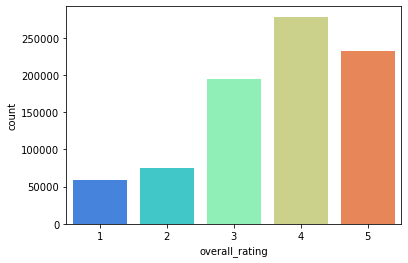

In [13]:
# Check the distribution of overall_rating

sns.countplot(x=df['overall_rating'], palette='rainbow')

We also create another binary variable to determine a high rating (4 and 5) with low rating (1, 2, 3)

In [14]:
#If rating is a 4 or a 5, that is considered high rating
df['high_rating'] = ((df.overall_rating == 4) | (df.overall_rating == 5)) * 1

In [15]:
df.high_rating.value_counts()

1    510532
0    328034
Name: high_rating, dtype: int64

let's find something about the firms.

In [16]:
df.firm.nunique()

428

In [17]:
#find the top 10 companies that have the most interviewing information
df.groupby('firm')['firm'].count().nlargest(10)

firm
IBM           60436
McDonald-s    49450
Deloitte      46995
EY            34050
PwC           33227
Oracle        31941
Microsoft     26675
J-P-Morgan    25814
KPMG          24815
Apple         20797
Name: firm, dtype: int64

In this dataset, the interviewed employees come from 428 companies and the top 10 compnies that have the most interview information were from IBM ,McDonld-s, Deloitte, EY, PwC, Oracle, Microsoft, J-P-Morgan, KPMG and Apple.

In [18]:
#find the top 10 overall_rating companies
df.groupby('firm')['overall_rating'].mean().nlargest(10)

firm
The-Survey-Association    5.000000
Time-Etc                  4.785714
Northern-Gas-and-Power    4.719682
CarShop-UK                4.651163
Michelmores               4.610390
Bain-and-Company          4.559757
Gateley                   4.540984
Kingsley-Healthcare       4.500000
Sport-England             4.500000
Taylor-Wimpey             4.497396
Name: overall_rating, dtype: float64

In [19]:
#find the number of interviewed employees from the top 10 overall_rating companies
len(df[df.firm == 'The-Survey-Association'])
len(df[df.firm == 'Time-Etc'])
len(df[df.firm == 'Northern-Gas-and-Power'])
len(df[df.firm == 'CarShop-UK'])
len(df[df.firm == 'Michelmores'])
len(df[df.firm == 'Bain-and-Company'])
len(df[df.firm == 'Gateley'])
len(df[df.firm == 'Kingsley-Healthcare'])
len(df[df.firm == 'Sport-England'])
len(df[df.firm == 'Taylor-Wimpey'])

3

42

503

258

77

3623

61

122

24

384

The highest overall_rating company has only three rows of data, also the top 10 rated companies have very few rows of data compared to the whole dataset. We should not assume these are best the companies to work for as the small amount of data might skew the ratings.

# 4. Data Cleaning

## 4.1 Drop NaNs

In [20]:
df.isna().sum()
df.isna().sum().sum()

column_label                0
firm                        0
date_review                 0
job_title                   0
current                     0
location               297338
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2219
pros                        0
cons                        8
use                    838566
high_rating                 0
dtype: int64

2635357

In [21]:
#check the ratio of Nan in each column
df.isna().any()
df.location.isna().sum()/len(df.location)
df.work_life_balance.isna().sum()/len(df.work_life_balance)
df.culture_values.isna().sum()/len(df.culture_values)
df.diversity_inclusion.isna().sum()/len(df.diversity_inclusion)
df.career_opp.isna().sum()/len(df.career_opp)
df.comp_benefits.isna().sum()/len(df.comp_benefits)
df.senior_mgmt.isna().sum()/len(df.senior_mgmt)
df.headline.isna().sum()/len(df.headline)

column_label           False
firm                   False
date_review            False
job_title              False
current                False
location                True
overall_rating         False
work_life_balance       True
culture_values          True
diversity_inclusion     True
career_opp              True
comp_benefits           True
senior_mgmt             True
recommend              False
ceo_approv             False
outlook                False
headline                True
pros                   False
cons                    True
use                     True
high_rating            False
dtype: bool

0.35457912674732817

0.17875039054767305

0.22821459491560592

0.8377396650949359

0.17589670938244575

0.17897458279968423

0.18588399720475193

0.002646184080919093

From the above calculation, we could not drop the NaN rows in column (diversity_inclusion) because NaN occupies almost 84% of the total values in the column. So we can only drop NaN in the column of location,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt and headline.

We agree to drop the columns that have a majority of NA values.

In [22]:
df2 = df.copy()

In [23]:
#We see that column USE is filled with NAN values. We completely remove
df2.drop(columns="use",inplace=True)
#We drop diversity inclusion becuase of the 84% NA Values
df2.drop(columns='diversity_inclusion',inplace=True)
#We drop column label because it has no meaning
df2.drop(columns="column_label",inplace=True)

In [24]:
df2.location.fillna('',inplace=True) #For the 297,338 NAN values in Location, we replace with ''
df2.cons.fillna('',inplace=True) #For the 8 NAN values in cons, we replace with ''
df2.headline.fillna('',inplace=True) #For the 2,219 NAN values in headline, we replace with ''
df2.job_title.replace(to_replace=" ",value=" anonymous employee",inplace=True)

For the remaining columns with null values, they are supposed to contain a rating from 1 to 5. Replacing these values with an integer such as 0 will skew the data. Therefore we will drop the rows with null values in these columns.

In [25]:
# drop rows where 'culture_values' is NaN
df2.dropna(how='any', subset=['culture_values'], inplace=True)
# drop rows where 'comp_benefits' is NaN
df2.dropna(how='any', subset=['comp_benefits'], inplace=True)
# drop rows where 'senior_mgmt' is NaN
df2.dropna(how='any', subset=['senior_mgmt'], inplace=True)
# drop rows where 'culture_values' is NaN
df2.dropna(how='any', subset=['career_opp'], inplace=True)
# drop rows where 'work_life_balance' is NaN
df2.dropna(how='any', subset=['work_life_balance'], inplace=True)

In [26]:
df2.isna().sum()

firm                 0
date_review          0
job_title            0
current              0
location             0
overall_rating       0
work_life_balance    0
culture_values       0
career_opp           0
comp_benefits        0
senior_mgmt          0
recommend            0
ceo_approv           0
outlook              0
headline             0
pros                 0
cons                 0
high_rating          0
dtype: int64

In [27]:
# check that we still have an adequate amount of rows and columns left
print("dataset afert cleaning: ") 
df2.shape
print("original dataset: ") 
df.shape
#We dropped these rows
print("total rows dropped ")
(len(df) - len(df2))

dataset afert cleaning: 


(637409, 18)

original dataset: 


(838566, 21)

total rows dropped 


201157

## 4.2 Data Manipulation

In [28]:
df = df2

Convert the 'recommend', 'ceo_approv', and 'outlook' column values to make it easier to understand:
<ul>
<li><b>x</b>: -1 (for negative sentiment)
<li><b>v</b>: 1 (for positive sentiment)
<li><b>r and o </b>: 0 (for neutral and no opinoin sentiment)
</ul>

In [29]:
# convert reccomend values to -1 for negative rec, 1 for positive rec, and 0 for neutral/ no opinoin
df['recommend'] = df['recommend'].apply(lambda x: -1 if x =='x'\
                                       else 1 if x == 'v'\
                                       else 0)
# convert 'ceo_approv' values to -1 for negative rec, 1 for positive rec, and 0 for neutral/ no opinoin
df['ceo_approv'] = df['ceo_approv'].apply(lambda x: -1 if x =='x'\
                                       else 1 if x == 'v'\
                                       else 0)
# convert 'outlook' values to -1 for negative rec, 1 for positive rec, and 0 for neutral/ no opinoin
df['outlook'] = df['outlook'].apply(lambda x: -1 if x =='x'\
                                       else 1 if x == 'v'\
                                       else 0)

In [30]:
# check if cleaning steps worked
df[['recommend', 'ceo_approv', 'outlook']].head()

,recommend,ceo_approv,outlook
1,-1,0,-1
2,0,0,0
3,1,1,1
4,0,0,0
5,1,0,1


We want to make all the string values to be lower capitalization

In [31]:
df.pros = df.pros.apply(lambda x: x.lower())
df.cons = df.cons.astype('str') 
df.cons = df.cons.apply(lambda x: x.lower())
df.headline = df.headline.astype('str') 
df.headline = df.headline.apply(lambda x: x.lower())
df.job_title = df.job_title.astype('str') 
df.job_title = df.job_title.apply(lambda x: x.lower())
df.location = df.location.astype('str') 
df.location = df.location.apply(lambda x: x.lower())
df.firm = df.firm.apply(lambda x: x.lower())

## 4.3 Find the job satisfaction from different work stuations

In [32]:
df.rename(columns = {'current':'work_status'},inplace = True)

In [33]:
df.groupby('work_status').size()

work_status
Current Contractor                              1
Current Contractor, less than 1 year            2
Current Contractor, more than 1 year            3
Current Employee                           115524
Current Employee, less than 1 year          44212
Current Employee, more than 1 year          75912
Current Employee, more than 10 years        23379
Current Employee, more than 3 years         61704
Current Employee, more than 5 years         37460
Current Employee, more than 8 years         17198
Current Freelancer, more than 3 years           1
Current Intern, less than 1 year                1
Former Contractor                               2
Former Contractor, less than 1 year             6
Former Contractor, more than 1 year             1
Former Contractor, more than 8 years            1
Former Employee                             81780
Former Employee, less than 1 year           35743
Former Employee, more than 1 year           58969
Former Employee, more than 10 years   

The main work status are divided into two groups, current employee and former employee,other work status have very few rows of data that we can ignore.

In [34]:
# create a new column work_status1 to define current and former employees
df['work_status1'] = df.work_status.apply(lambda x: 1.0 if 'Current Employee'in x else 0.0)
df['work_status1']

1         0.0
2         0.0
3         0.0
4         1.0
5         1.0
         ... 
838550    1.0
838551    0.0
838552    1.0
838554    1.0
838555    1.0
Name: work_status1, Length: 637409, dtype: float64

In [35]:
#find the data from current employees
df_current_employee = df[df.work_status1 == 1.0]
df_current_employee.head(2)
df_current_employee.shape

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
4,sotheby-s,2021-05-22,anonymous employee,Current Employee,hong kong,3,2.0,2.0,3.0,2.0,3.0,0,0,0,review,"exposure to artworks, great team of specialists","work life balance, company culture",0,1.0
5,sotheby-s,2021-05-15,administrator,"Current Employee, less than 1 year","london, england, england",4,4.0,4.0,3.0,3.0,3.0,1,0,1,fun job and nice people but huge workload and ...,"fantastic art, nice enthusiastic people and a ...",very low pay and huge workload,1,1.0


(375389, 19)

In [36]:
#find the average scores on every rating from current employee
df_current_mean =df_current_employee.agg({'overall_rating':'mean','work_life_balance':'mean',\
                                          'culture_values':'mean',\
                                          'career_opp':'mean','comp_benefits':'mean','senior_mgmt':'mean',\
                                          'recommend':'mean','ceo_approv':'mean','outlook':'mean'})

df_current_mean

overall_rating       3.809155
work_life_balance    3.520090
culture_values       3.778355
career_opp           3.648149
comp_benefits        3.509362
senior_mgmt          3.367520
recommend            0.467249
ceo_approv           0.396983
outlook              0.413781
dtype: float64

In [37]:
#find the data from former employees
df_former_employee = df[df.work_status1 == 0.0]
df_former_employee.head(2)
df_former_employee.shape

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,don't do it,people in leadership roles have been there for...,pressure to do whatever the leaders want\r\nno...,0,0.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,4.0,0,0,0,international auction house,"great exposure, respectful environment and bea...",ot during peak seasons and often underpaid,1,0.0


(262020, 19)

In [38]:
#find the average scores on every rating from former employee
df_former_mean =df_former_employee.agg({'overall_rating':'mean','work_life_balance':'mean',\
                                        'culture_values':'mean','career_opp':'mean',\
                                        'comp_benefits':'mean','senior_mgmt':'mean','recommend':'mean',\
                                        'ceo_approv':'mean','outlook':'mean'})
df_former_mean

overall_rating       3.396504
work_life_balance    3.174700
culture_values       3.322739
career_opp           3.248744
comp_benefits        3.276872
senior_mgmt          2.930986
recommend            0.210988
ceo_approv           0.210591
outlook              0.192386
dtype: float64

In [39]:
# find the gap from current employee with former employee
df_difference = df_current_mean - df_former_mean
df_difference

overall_rating       0.412651
work_life_balance    0.345389
culture_values       0.455617
career_opp           0.399405
comp_benefits        0.232490
senior_mgmt          0.436534
recommend            0.256261
ceo_approv           0.186392
outlook              0.221395
dtype: float64

### Conclusion 1: It is obvious that current employees have better job satisfiction on evey aspects than former employees. Especially on overall_rating, culture_values, career opportunity and senior management.

In [40]:
# find the data of current employee within different groups of working years inside the company
df_current_employee['work_more_than_10years'] = df_current_employee['work_status'].\
                                                apply(lambda x: 1.0 if 'more than 10 years' in x else 0.0)
df_current_employee['work8_to_10years'] = df_current_employee['work_status'].\
                                          apply(lambda x: 1.0 if 'more than 8 years' in x else 0.0)
df_current_employee['work5_to_8years'] = df_current_employee['work_status'].\
                                         apply(lambda x: 1.0 if 'more than 5 years' in x else 0.0)
df_current_employee['work3_to_5years'] = df_current_employee['work_status'].\
                                         apply(lambda x: 1.0 if 'more than 3 years' in x else 0.0)
df_current_employee['work1_to_3years'] = df_current_employee['work_status'].\
                                         apply(lambda x: 1.0 if 'more than 1 year' in x else 0.0)
df_current_employee['work0_to_1year'] = df_current_employee['work_status'].\
                                        apply(lambda x: 1.0 if 'less than 1 year' in x else 0.0)
df_current_employee['current_worker'] = df_current_employee['work_status'].\
                                       apply(lambda x: 1.0 if 'Current Employee' in x else 0.0)

In [41]:
df_current_employee.head(2)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,...,cons,high_rating,work_status1,work_more_than_10years,work8_to_10years,work5_to_8years,work3_to_5years,work1_to_3years,work0_to_1year,current_worker
4,sotheby-s,2021-05-22,anonymous employee,Current Employee,hong kong,3,2.0,2.0,3.0,2.0,...,"work life balance, company culture",0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,sotheby-s,2021-05-15,administrator,"Current Employee, less than 1 year","london, england, england",4,4.0,4.0,3.0,3.0,...,very low pay and huge workload,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [42]:
#find the average overall_rating from different working year groups of current employee
df_current_employee[df_current_employee.work_more_than_10years == 1.0].overall_rating.mean()
df_current_employee[df_current_employee.work8_to_10years == 1.0].overall_rating.mean()
df_current_employee[df_current_employee.work5_to_8years == 1.0].overall_rating.mean()
df_current_employee[df_current_employee.work3_to_5years == 1.0].overall_rating.mean()
df_current_employee[df_current_employee.work1_to_3years == 1.0].overall_rating.mean()
df_current_employee[df_current_employee.work0_to_1year == 1.0].overall_rating.mean()
df_current_employee[df_current_employee.current_worker == 1.0].overall_rating.mean()

3.772060396081954

3.808349808117223

3.7856380138814734

3.7578114870997017

3.7594451470123302

3.938727042431919

3.809155302899126

### Conclusion 2: Employees who is working in the company at the moment tends to have high average score on overall_rating, among them those works less than 1 year has the highest overall_rating,those works 3 to 5 years tends have the lowest overall_rating on average.

In [43]:
# find the data of former employee within different groups of working years in the company
df_former_employee['work_more_than_10years'] = df_former_employee['work_status'].\
                                               apply(lambda x: 1.0 if 'more than 10 years' in x else 0.0)
df_former_employee['work8_to_10years'] = df_former_employee['work_status'].\
                                         apply(lambda x: 1.0 if 'more than 8 years' in x else 0.0)
df_former_employee['work5_to_8years'] = df_former_employee['work_status'].\
                                        apply(lambda x: 1.0 if 'more than 5 years' in x else 0.0)
df_former_employee['work3_to_5years'] = df_former_employee['work_status'].\
                                        apply(lambda x: 1.0 if 'more than 3 years' in x else 0.0)
df_former_employee['work1_to_3years'] = df_former_employee['work_status'].\
                                        apply(lambda x: 1.0 if 'more than 1 year' in x else 0.0)
df_former_employee['work0_to_1year'] = df_former_employee['work_status'].\
                                       apply(lambda x: 1.0 if 'less than 1 year' in x else 0.0)
df_former_employee['former_worker'] = df_former_employee['work_status'].\
                                      apply(lambda x: 1.0 if 'Former Employee' in x else 0.0)

In [44]:
df_former_employee.head(2)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,...,cons,high_rating,work_status1,work_more_than_10years,work8_to_10years,work5_to_8years,work3_to_5years,work1_to_3years,work0_to_1year,former_worker
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,...,pressure to do whatever the leaders want\r\nno...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,...,ot during peak seasons and often underpaid,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
#find the average overall_rating from different working year groups of former employee
df_former_employee[df_former_employee.work_more_than_10years == 1.0].overall_rating.mean()
df_former_employee[df_former_employee.work8_to_10years == 1.0].overall_rating.mean()
df_former_employee[df_former_employee.work5_to_8years == 1.0].overall_rating.mean()
df_former_employee[df_former_employee.work3_to_5years == 1.0].overall_rating.mean()
df_former_employee[df_former_employee.work1_to_3years == 1.0].overall_rating.mean()
df_former_employee[df_former_employee.work0_to_1year == 1.0].overall_rating.mean()
df_former_employee[df_former_employee.former_worker == 1.0].overall_rating.mean()

3.3806734992679357

3.45955474967261

3.4553407647805843

3.4342398238723075

3.342506867433106

3.2252705763906366

3.396393783016275

###  Conclusion 3: It is obvious that former employee from every working year group in the campany has a lower average score on overall_rating than current employee. Former employee who works 8 to 10 years has the highest overall_rating score of the company,and those who works more than 3 years(3-5,5-8,8-10,more than 10) have very similiar average overall_rating. The lowest overall-rating comes from those who works less than 1 year in the company. 
### This actually makes sense, former employee who worked less than 1 year tends to have low overall rating to the company and this explains why they leave less than a year. Former employee who works more than 3 years tends to give higher overall rating to the company because they have stayed in the company for a longer time on one hand, and they might have worked in other companies since they leave thus they will have better evaluation about the former company.  

# 5.Interesting Findings

## 5.1 Data analysis on pros and cons.

Here we want to find the most commonly used words in the pros and cons columns and compare the resutls.

Pros_Words Analysis

In [46]:
df.pros.head()

1    people in leadership roles have been there for...
2    great exposure, respectful environment and bea...
3                      good team, support and training
4      exposure to artworks, great team of specialists
5    fantastic art, nice enthusiastic people and a ...
Name: pros, dtype: object

In [47]:
# save values in 'pros' column to a list that we can use
pros = []

for line in df.pros.values:
    pros.append(line)

In [48]:
# convert to string so cleaning steps can be performed
pros = str(pros).lower()

import re
#Cleaning the pros column for special characters
pros=re.sub('(\\\\n)|(b["\'](RT)?)|[/?>.<_+=|,"\':;{}\[\])(*^%$#@!~`\\\\-]', ' ', pros)

In [49]:
# check if cleaning steps worked
pros[0:20]

'  people in leadersh'

Import stopwords

In [50]:
# open stopwords.txt file to read the data
f2 = open('stopwords.txt', 'r')

# add stop words to a list
stop_words = []
for line in f2:
    stop_words.append(line)
    
# close the stopwords.txt file
f2.close()

In [51]:
# remove first 6 items in the list as these are not stop words
del(stop_words[0:6])

# include other stop words that we don't want
stop_words.append('a lot')
stop_words.append('lots')
stop_words.append('lot')

In [52]:
# remove the '\n' from the end of the words and add it to a cleaned list
cleaned_stop_words = []
for x in range(len(stop_words)):
    cleaned_stop_words.append(stop_words[x].strip('\n'))

Display the top 20 pro words and counts

In [53]:
# append words to a list
pro_words = pros.split()

In [54]:
type(pro_words)

list

In [55]:
# remove stop words from the pros words list
cleaned_pro_words = []
for a in range(len(pro_words)):
    if pro_words[a] not in cleaned_stop_words:
        cleaned_pro_words.append(pro_words[a])

In [56]:
# use counter library to help count the frequency of the words in the list
from collections import Counter
counts = Counter(cleaned_pro_words)

# display top 20 most common words used
counts.most_common(20)

[('people', 121211),
 ('benefits', 87471),
 ('company', 87420),
 ('environment', 66394),
 ('opportunities', 63194),
 ('culture', 60758),
 ('life', 59937),
 ('balance', 54095),
 ('pay', 48775),
 ('flexible', 45861),
 ('team', 45786),
 ('nice', 41824),
 ('friendly', 38074),
 ('career', 35641),
 ('management', 35001),
 ('training', 34098),
 ('hours', 32385),
 ('job', 32103),
 ('learn', 31543),
 ('time', 31309)]

The most common positive phrases are related to the people, benefits, company, environment, opportunities, culture, work life balance and etc.

Cons_Words Analysis

In [57]:
df.cons.head()

1    pressure to do whatever the leaders want\r\nno...
2           ot during peak seasons and often underpaid
3         high-stress with relatively low conpensation
4                   work life balance, company culture
5                       very low pay and huge workload
Name: cons, dtype: object

In [58]:
# save values in 'cons' column to a list that we can use
cons = []

for line in df.cons.values:
    cons.append(line)

In [59]:
# convert to string so cleaning steps can be performed
cons = str(cons).lower()

import re
#Cleaning the pros column for any special characters
cons=re.sub('(\\\\n)|(b["\'](RT)?)|[/?>.<_+=|,"\':;{}\[\])(*^%$#@!~`\\\\-]', ' ', cons)

In [60]:
# check if cleaning steps worked
cons[0:20]

'  pressure to do wha'

In [61]:
# append words to a list
con_words = cons.split()

Display the top 20 con words and counts

In [62]:
cleaned_con_words = []
for a in range(len(con_words)):
    if con_words[a] not in cleaned_stop_words:
        cleaned_con_words.append(con_words[a])

In [63]:
from collections import Counter
counts = Counter(cleaned_con_words)
# first element is '' so drop it
counts.most_common(20)

[('management', 101792),
 ('hours', 76906),
 ('company', 68939),
 ('people', 62386),
 ('pay', 58788),
 ('time', 53927),
 ('life', 48538),
 ('balance', 41026),
 ('managers', 39352),
 ('employees', 38580),
 ('salary', 38407),
 ('staff', 38084),
 ('low', 36142),
 ('job', 34862),
 ('poor', 33099),
 ('sometimes', 31068),
 ('hard', 30957),
 ('team', 29810),
 ('lack', 29621),
 ('don', 29601)]

The most commonly used cons of a company have to do with management, hours, people, pay, and work life balance.

#### Visualization

In [64]:
# create word cloud for the pros column
pro_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 20,
                min_font_size = 10).generate(pros)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Most Common Pro Words')

(-0.5, 799.5, 799.5, -0.5)

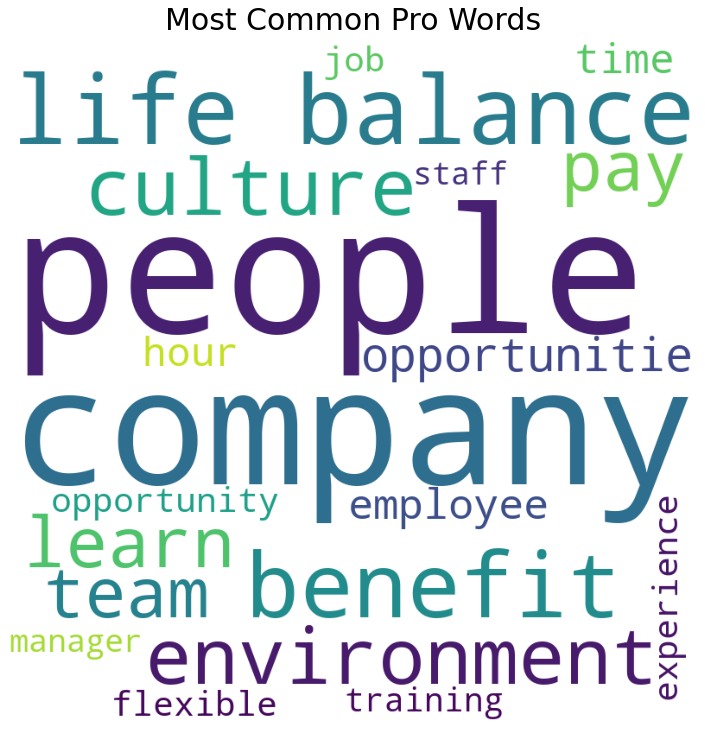

In [65]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(pro_wordcloud)
plt.title("Most Common Pro Words",fontsize=30)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [66]:
# create the con word cloud
con_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 20,
                colormap = 'inferno',
                min_font_size = 10).generate(cons)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Most Common Con Words')

(-0.5, 799.5, 799.5, -0.5)

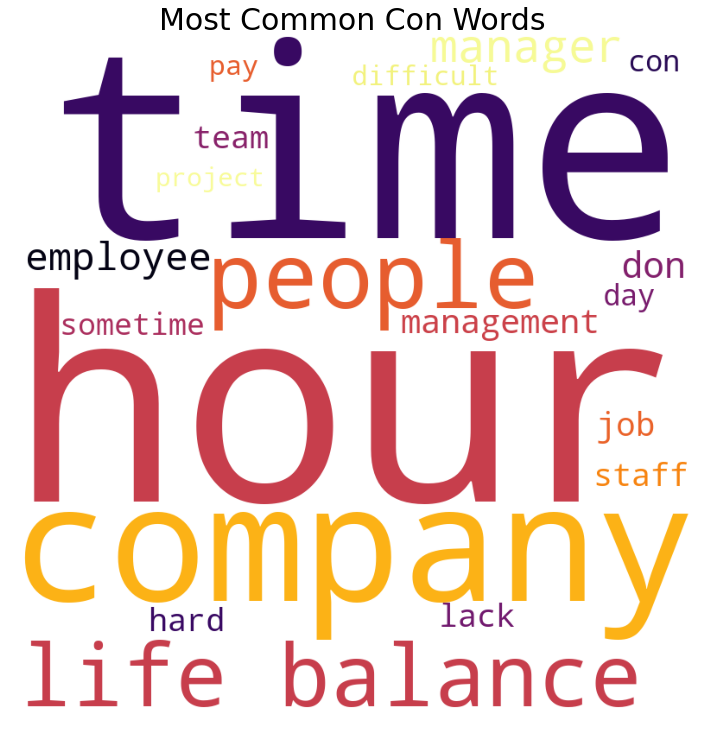

In [67]:
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(con_wordcloud)
plt.title("Most Common Con Words",fontsize=30)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### When we compare the two word clouds (pros shown 

When we compare the two word clouds we see that the people, company, manager, life balance, and staff appear the most often on both lists.
These factors can either make or break a company so management should focus heavily on these areas. For example, investing in HR and recruiting to make sure that the managers and people that are hired are a good fit for the company.

When we look at the pros word cloud we see that training and opportunity appears (whereas not in the cons). This tells us that if companies want to improve their overall rating, they should focus on offering their employees plans to grow their career such as through continued professional education and ongoing trainings. 

For the cons word cloud we see that time and hour appear the most and therefore firms should try to limit their employees working overtime and again focus on resource planning and operations in order to make sure that their employees are not being spread too thin.

# 5.2 Investigate the difference in these  bigtech comanies: Apple, Google, and Microsoft, Salesforce, Oracle, and IBM.


### As students in the business analytics field, we want to analyze what tech firms may potentially be the best and worst to work at based on the variables in the data.

In [68]:
#First, we look at all of the most counted firms in the dataset using the value_counts code.
df.firm.value_counts().nlargest(25)


ibm                       45670
deloitte                  35269
mcdonald-s                32997
ey                        25795
oracle                    24748
pwc                       23820
microsoft                 19356
j-p-morgan                19332
kpmg                      17953
apple                     15933
citi                      14141
sap                       12060
hsbc-holdings             10604
google                    10513
tesco                      8832
marriott-international     8102
thomson-reuters            7405
barclays                   7369
american-express           7288
vodafone                   6833
salesforce                 6739
morgan-stanley             6414
goldman-sachs              6084
pizza-hut                  5561
bny-mellon                 5095
Name: firm, dtype: int64

#### After reviewing the amount of data we have for the top 25 most firms, we decided to use apple, google, oracle, ibm, and microsoft as our big tech companies to analyze.

In [69]:
bigtech = df [(df.firm == 'apple') \
              |(df.firm == 'google') \
              |(df.firm == 'microsoft')\
              |(df.firm == 'salesforce')\
              |(df.firm == 'oracle')\
              |(df.firm == 'ibm')]
len(bigtech)

122959

In [70]:
len(bigtech)/len(df) # the bigtech firms make up about 19% of our data 

0.19290439890243155

## After creating a subset of the data of Big Tech Firms, there is about 122,529 rows that represents around 19% of the total dataset.

In [71]:
#As data analysts, we want to investigate what companies have the happier analyst
bigtech.job_title.value_counts()

 anonymous employee               34097
 software engineer                 4650
 senior software engineer          1937
 specialist                        1565
 applications developer            1314
                                  ...  
 software technical support           1
 senior it delivery executive         1
 account integration architect        1
 client services procurement          1
 ebr                                  1
Name: job_title, Length: 12379, dtype: int64

In [72]:
bigtech['analyst'] = bigtech.job_title.str.contains('analyst') * 1.0

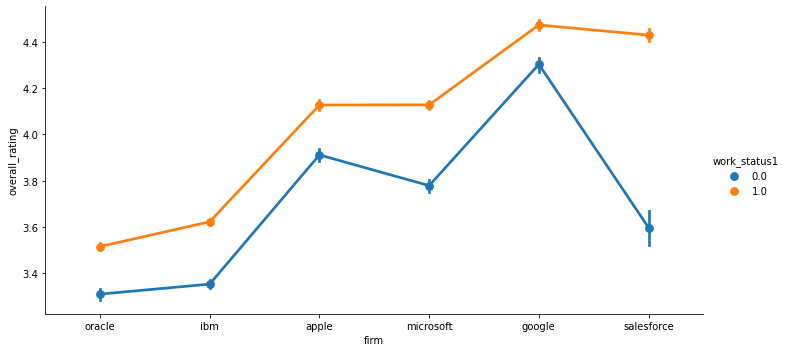

In [73]:
#This scatterplot to show current and former employees in those big tech firms
sns.catplot(x='firm', \
            y= 'overall_rating', \
            hue='work_status1', \
            kind= 'point', \
            data=bigtech, \
            aspect=2)

### Additional Finding... At Salesforce, we found that former employees is dramatically worse than current employees. We can see that current employees, taking a value of 1, have a generally higher overall_rating over former employees. This may be biased in that former employees have reasons on leaving the company, which results in a more negative rating. 

## Our team deduced that Google is the best highest rating of current employees, where as Oracle and IBM has the worst rating of employees in general.

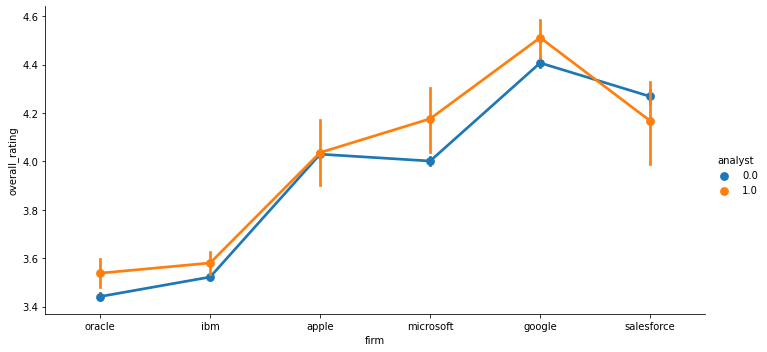

In [74]:
#This scatterplot to show analyst employees in the big tech firms
sns.catplot(x='firm', \
            y= 'overall_rating', \
            hue='analyst', \
            kind= 'point', \
            data=bigtech, \
            aspect=2)

### This graph, we can see that the analyst working at google and salesforece has generally higher overall_rating than analysts working at microsoft and apple. In addition, we see that anayst are overall generally happier at Google compared to other firms.

## Additionally, we saw Salesforce having a large decrease from current employees to former employees. We discover non-analyst roles at Salesforce are happier than analyst roles.

In [75]:
bigtech.groupby('firm').mean()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,high_rating,work_status1,analyst
firm,,,,,,,,,,,,
apple,4.030063,3.423712,4.141091,3.532229,4.143727,3.521998,0.578736,0.611435,0.563171,0.746313,0.548610,0.013682
google,4.411110,4.097784,4.347094,4.138020,4.460478,3.952915,0.717017,0.610863,0.668411,0.871968,0.633406,0.036051
ibm,3.524940,3.647690,3.536238,3.448106,3.111561,2.976330,0.275476,0.176812,0.161222,0.548434,0.637114,0.048719
microsoft,4.003410,3.708359,3.850124,3.829149,4.056107,3.408607,0.621771,0.549855,0.556623,0.744834,0.642695,0.009661
oracle,3.446339,3.782003,3.259374,3.274244,3.203976,3.001333,0.269678,0.227493,0.281477,0.515112,0.663043,0.050307
salesforce,4.266212,3.969877,4.367859,4.144383,4.400505,3.941089,0.687491,0.767770,0.735272,0.809319,0.803680,0.023891


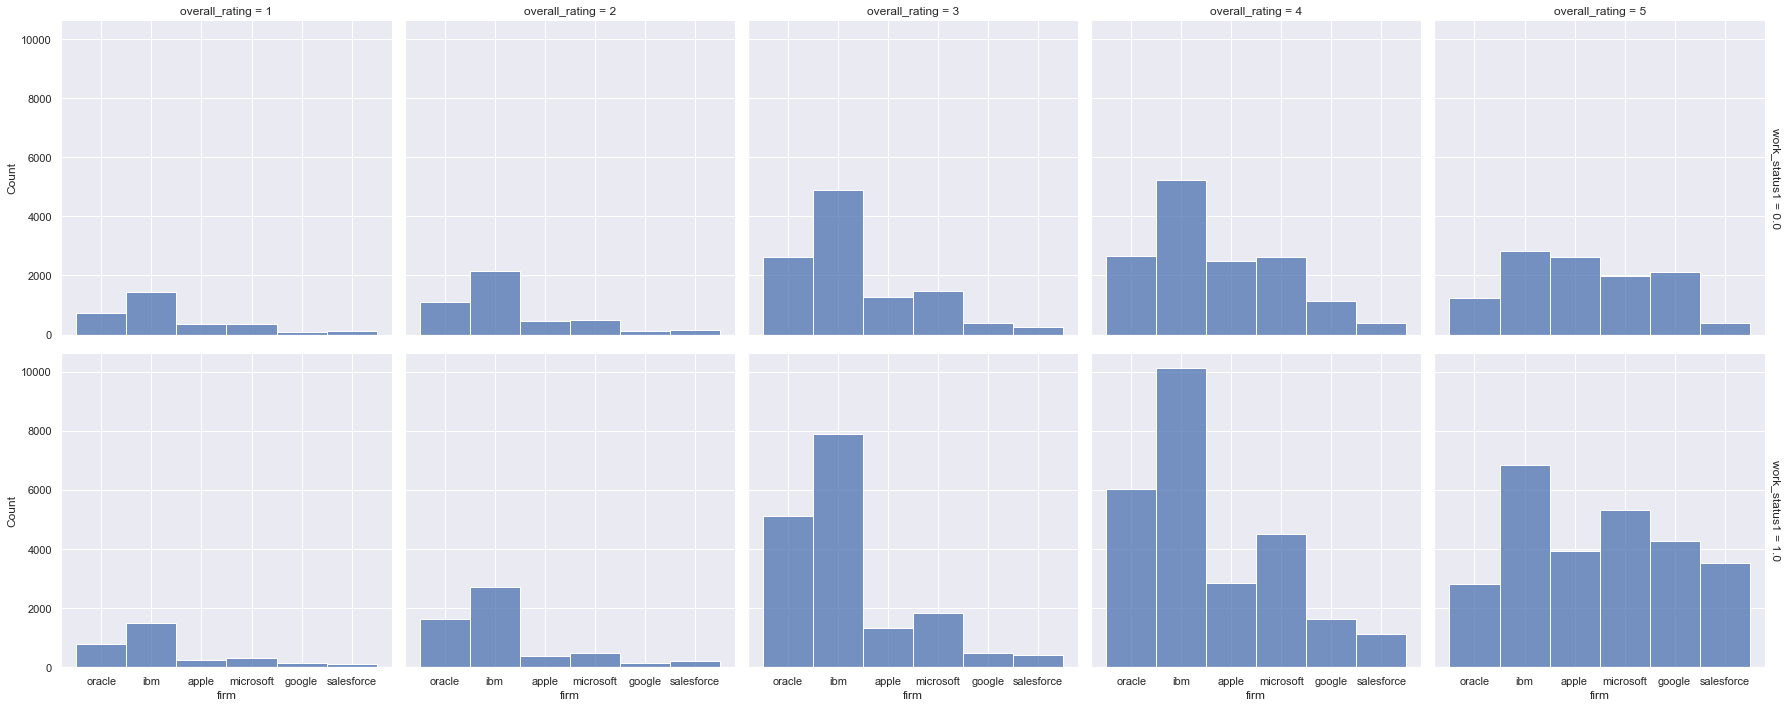

In [76]:
sns.set_theme(style="darkgrid")
sns.displot(
    bigtech, x="firm", col="overall_rating", row="work_status1",
    binwidth=3, height=5, facet_kws=dict(margin_titles=True),
)


### IBM has the most users that had an overall rating at 4. However, they are still one of the lowest overall rating tech companies

In [77]:
bigtech.groupby(['firm','work_status1','analyst']).mean()

overall_rating  work_life_balance  \
firm       work_status1 analyst                                      
apple      0.0          0.0            3.911918           3.342620   
                        1.0            3.894118           3.305882   
           1.0          0.0            4.127440           3.489080   
                        1.0            4.127820           3.601504   
google     0.0          0.0            4.297729           4.001082   
                        1.0            4.435897           4.083333   
           1.0          0.0            4.470323           4.149161   
                        1.0            4.565022           4.228700   
ibm        0.0          0.0            3.347751           3.451841   
                        1.0            3.450286           3.563429   
           1.0          0.0            3.620752           3.752550   
                        1.0            3.664444           3.824444   
microsoft  0.0          0.0            3.776087           3.466120   
                        1.0            4.012048           3.650602   
           1.0          0.0            4.126702           3.839818   
                        1.0            4.307692           4.076923   
oracle     0.0          0.0            3.299281           3.605625   
                        1.0            3.517073           3.746341   
           1.0          0.0            3.513869           3.873250   
                        1.0            3.548503           3.772455   
salesforce 0.0          0.0            3.603261           3.390528   
                        1.0            3.371429           3.200000   
           1.0          0.0            4.430624           4.110019   
                        1.0            4.388889           4.222222   

                                 culture_values  career_opp  comp_benefits  \
firm       work_status1 analyst                                              
apple      0.0          0.0            4.026453    3.409455       4.074012   
                        1.0            3.847059    3.600000       3.952941   
           1.0          0.0            4.237454    3.629995       4.203415   
                        1.0            4.218045    3.721805       4.127820   
google     0.0          0.0            4.226068    4.053002       4.446728   
                        1.0            4.365385    4.282051       4.384615   
           1.0          0.0            4.411591    4.181168       4.474363   
                        1.0            4.479821    4.201794       4.340807   
ibm        0.0          0.0            3.346796    3.305134       3.094216   
                        1.0            3.483429    3.300571       3.018286   
           1.0          0.0            3.635276    3.529030       3.127545   
                        1.0            3.737778    3.542963       3.045185   
microsoft  0.0          0.0            3.579687    3.675545       4.073467   
                        1.0            3.891566    3.759036       3.915663   
           1.0          0.0            3.997325    3.912938       4.046612   
                        1.0            4.125000    4.038462       4.153846   
oracle     0.0          0.0            3.032917    3.164586       3.257788   
                        1.0            3.492683    3.182927       3.019512   
           1.0          0.0            3.353345    3.331642       3.193656   
                        1.0            3.542515    3.289820       2.976048   
salesforce 0.0          0.0            3.719720    3.578416       4.143634   
                        1.0            3.771429    3.257143       3.914286   
           1.0          0.0            4.525709    4.287146       4.464272   
                        1.0            4.531746    4.182540       4.484127   

                                 senior_mgmt  recommend  ceo_approv   outlook  \
firm       work_status1 analyst                                                 
apple      0.0       

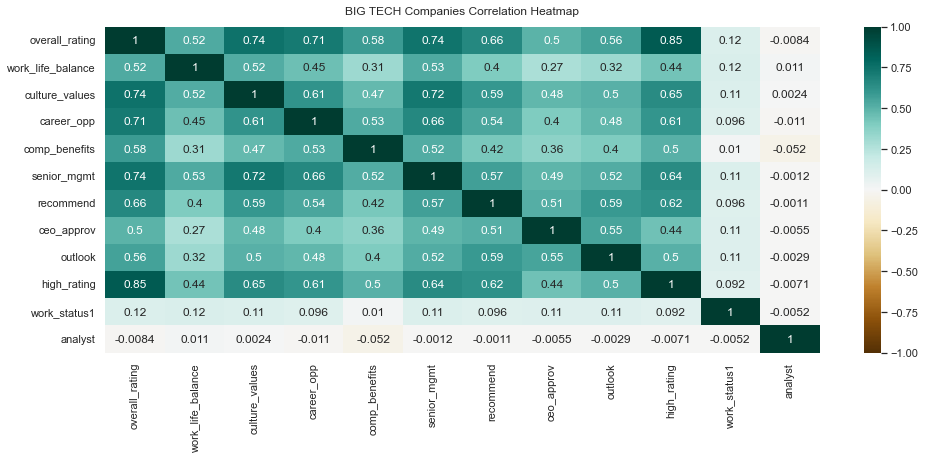

In [78]:
#Using a heatmap to find the correlations between variables
plt.figure(figsize=(16, 6))
figure1=sns.heatmap(bigtech.corr(),vmin=-1, vmax=1,annot=True,cmap='BrBG');
figure1.set_title('BIG TECH Companies Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Interpretation 
1. We find that the former and current employees from Salesforce have a significant variation.
2. The firms that lack the most senior management are Oracle and IBM
3. IBM has the worst senior management, company benefits, ceo approval rating

In [79]:
bigtechanalyst = bigtech[bigtech.analyst == 1]

In [80]:
bigtechanalyst.groupby('firm').mean().sort_values(by='overall_rating')

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,high_rating,work_status1,analyst
firm,,,,,,,,,,,,
oracle,3.538153,3.763855,3.526104,3.254618,2.990361,3.062651,0.346185,0.330120,0.334940,0.546185,0.670683,1.0
ibm,3.580225,3.721798,3.637753,3.447640,3.034607,3.087191,0.350112,0.247640,0.255281,0.576180,0.606742,1.0
apple,4.036697,3.486239,4.073394,3.674312,4.059633,3.596330,0.655963,0.651376,0.610092,0.775229,0.610092,1.0
salesforce,4.167702,4.000000,4.366460,3.981366,4.360248,3.832298,0.639752,0.720497,0.664596,0.788820,0.782609,1.0
microsoft,4.176471,3.887701,4.021390,3.914439,4.048128,3.775401,0.652406,0.593583,0.636364,0.807487,0.556150,1.0
google,4.511873,4.168865,4.432718,4.234828,4.358839,4.100264,0.770449,0.593668,0.696570,0.897098,0.588391,1.0


Among all analyst roles for the big tech firms, we can see that Oracle and IBM are the worst overall rating companies among big tech firms. 

We use seaborn to visually understand the big tech firms data among each of the rating variables.

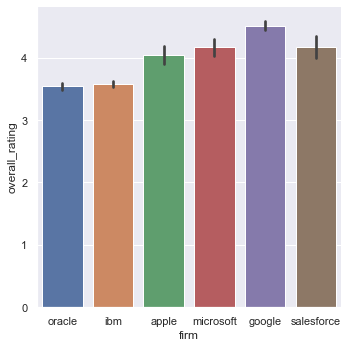

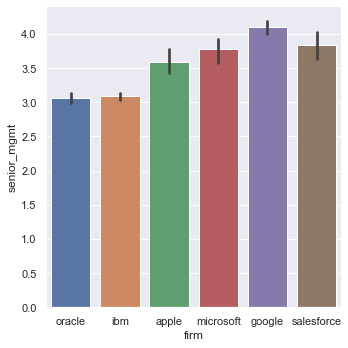

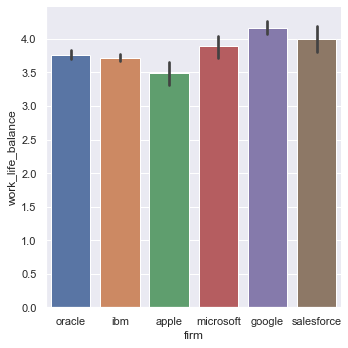

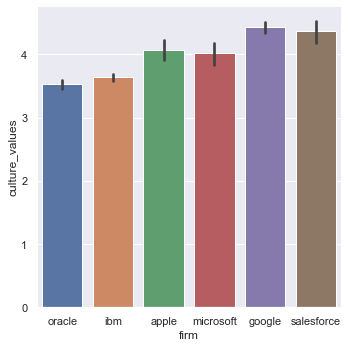

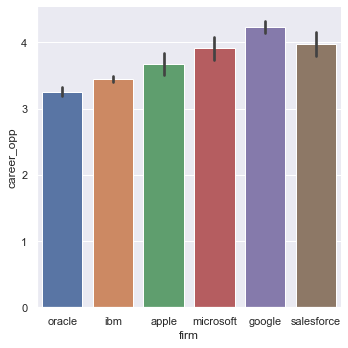

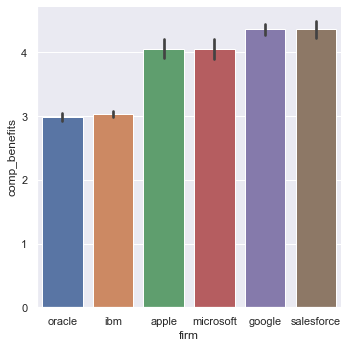

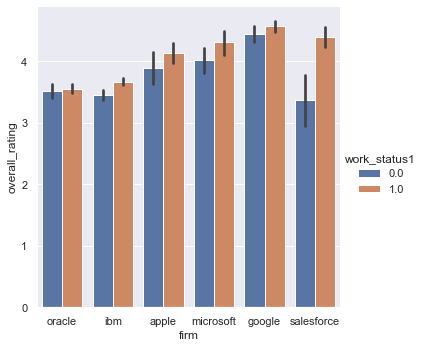

In [81]:
sns.catplot(x='firm',y='overall_rating',data=bigtechanalyst,kind='bar',aspect=1)
sns.catplot(x='firm',y='senior_mgmt',data=bigtechanalyst,kind='bar',aspect=1)
sns.catplot(x='firm',y='work_life_balance',data=bigtechanalyst,kind='bar',aspect=1)
sns.catplot(x='firm',y='culture_values',data=bigtechanalyst,kind='bar',aspect=1)
sns.catplot(x='firm',y='career_opp',data=bigtechanalyst,kind='bar',aspect=1)
sns.catplot(x='firm',y='comp_benefits',data=bigtechanalyst,kind='bar',aspect=1)
sns.catplot(x='firm',y='overall_rating',hue='work_status1',data=bigtechanalyst,kind='bar',aspect=1)

In [82]:
bigtech.groupby('firm').overall_rating.mean().sort_values(ascending=False)

firm
google        4.411110
salesforce    4.266212
apple         4.030063
microsoft     4.003410
ibm           3.524940
oracle        3.446339
Name: overall_rating, dtype: float64

### From these bar graphs, we can conclude that Google is the best among all categories. Google ranks the best to work at where overall rating average is 4.4, whereas Oracle ranks the worst at 3.4. This is almost a whole rating variation between the best and worst firms.

### Overall, Google has the higest overall rating compared to Oracle and IBM. Let's test to see why this is.

In [83]:
google = bigtech[bigtech.firm == 'google']
google.mean().sort_values(ascending=False)

comp_benefits        4.460478
overall_rating       4.411110
culture_values       4.347094
career_opp           4.138020
work_life_balance    4.097784
senior_mgmt          3.952915
high_rating          0.871968
recommend            0.717017
outlook              0.668411
work_status1         0.633406
ceo_approv           0.610863
analyst              0.036051
dtype: float64

In [84]:
worsttechfirm = bigtech[(bigtech.firm == 'oracle') | (bigtech.firm == 'ibm')]

In [85]:
#Test to see the variation or difference between variables
(google.mean() - worsttechfirm.mean()).sort_values(ascending=False)

comp_benefits        1.316438
senior_mgmt          0.967798
overall_rating       0.913794
culture_values       0.908158
career_opp           0.751016
outlook              0.464926
recommend            0.443578
ceo_approv           0.416239
work_life_balance    0.402890
high_rating          0.335244
work_status1        -0.012821
analyst             -0.013227
dtype: float64

### We see that company benefits and senior management and career opportunity are the biggest change from people who work at Google compared to those who work at IBM and Oracle

### Let's test to see why there is such a big variation between Google and Oracle and IBM rating.
#### We want to explore the reason for Google being the best rated and Oracle and IBM

In [86]:
bigtech.groupby('firm').mean()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,high_rating,work_status1,analyst
firm,,,,,,,,,,,,
apple,4.030063,3.423712,4.141091,3.532229,4.143727,3.521998,0.578736,0.611435,0.563171,0.746313,0.548610,0.013682
google,4.411110,4.097784,4.347094,4.138020,4.460478,3.952915,0.717017,0.610863,0.668411,0.871968,0.633406,0.036051
ibm,3.524940,3.647690,3.536238,3.448106,3.111561,2.976330,0.275476,0.176812,0.161222,0.548434,0.637114,0.048719
microsoft,4.003410,3.708359,3.850124,3.829149,4.056107,3.408607,0.621771,0.549855,0.556623,0.744834,0.642695,0.009661
oracle,3.446339,3.782003,3.259374,3.274244,3.203976,3.001333,0.269678,0.227493,0.281477,0.515112,0.663043,0.050307
salesforce,4.266212,3.969877,4.367859,4.144383,4.400505,3.941089,0.687491,0.767770,0.735272,0.809319,0.803680,0.023891


 We think it is best to narrow down our findings to a specific location.
 Let's test to see the differences between location of New York. Will employees complain about pay, compensation, managers, commute, or benefits?

In [87]:
worsttechfirm.groupby('location')['overall_rating'].agg({'mean','count'})\
            .sort_values(by='count',ascending=False).head(10)

,count,mean
location,,
,22207,3.436619
bangalore,9454,3.711022
hyderābād,2381,3.763965
pune,1462,3.755130
"new york, ny",1403,3.260157
"london, england, england",1212,3.353960
"austin, tx",1088,3.331801
"redwood city, ca",967,3.179938
"dublin, dublin",948,3.263713


In [88]:
google.groupby('location')['overall_rating'].agg({'mean','count'})\
        .sort_values(by='count',ascending=False).head(10)

,count,mean
location,,
,3501,4.440160
"mountain view, ca",1526,4.347313
"new york, ny",555,4.477477
"dublin, dublin",512,4.244141
"london, england, england",414,4.345411
"san francisco, ca",391,4.503836
hyderābād,281,4.537367
bangalore,249,4.602410
"los angeles, ca",190,4.536842


We want to find a location in common between the three firms

In [89]:
#This dataset only includes IBM, Google, and Oracle who work in New York
techfirmcompare = bigtech[(bigtech.location == 'new york, ny')\
                & ((bigtech.firm == 'ibm')|(bigtech.firm == 'google')|(bigtech.firm == 'oracle')) ]

In [90]:
techfirmcompare.groupby('firm').agg({'location':'count'\
                                     ,'overall_rating':'mean'\
                                     ,'work_life_balance':'mean'\
                                     ,'culture_values':'mean'\
                                     ,'career_opp':'mean'\
                                     ,'comp_benefits':'mean'\
                                     ,'senior_mgmt':'mean'\
                                     ,'recommend':'mean'\
                                     ,'ceo_approv':'mean'\
                                     ,'outlook':'mean'\
                                    })

,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook
firm,,,,,,,,,,
google,555,4.477477,4.250450,4.421622,4.207207,4.609009,3.969369,0.762162,0.637838,0.733333
ibm,1196,3.213211,3.427258,3.173913,3.250000,3.280100,2.730769,0.068562,0.054348,-0.024247
oracle,207,3.531401,3.637681,3.130435,3.449275,3.420290,3.009662,0.318841,0.251208,0.396135


In [91]:
#We set dummy variables for each of the firms
techfirmcompare = pd.get_dummies(techfirmcompare, columns=['firm'])
techfirmcompare

,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,...,outlook,headline,pros,cons,high_rating,work_status1,analyst,firm_google,firm_ibm,firm_oracle
239952,2021-05-27,enterprise sales,"Former Employee, more than 1 year","new york, ny",5,4.0,4.0,5.0,4.0,4.0,...,1,great company,great work environment company culture,not a lot of transparency,1,0.0,0.0,0,0,1
239954,2021-05-27,enterprise sales,"Former Employee, more than 1 year","new york, ny",5,4.0,4.0,5.0,4.0,4.0,...,1,great company,great work environment company culture,not a lot of transparency,1,0.0,0.0,0,0,1
240002,2021-05-25,currently unemployed and seeking work,Former Employee,"new york, ny",5,5.0,5.0,5.0,5.0,5.0,...,1,awesome place to work at,"learning, benefits, environment, pay, and enga...","not much, i was free to work the way i wanted",1,0.0,0.0,0,0,1
240135,2021-05-20,senior manager,"Current Employee, more than 8 years","new york, ny",3,5.0,3.0,3.0,3.0,4.0,...,0,good work life balance but hikes are rare,great flexibility in work timings and autonomy...,salary hike and promotions are rare,0,1.0,0.0,0,0,1
240341,2021-05-11,senior vice president,"Current Employee, more than 3 years","new york, ny",5,4.0,4.0,4.0,5.0,4.0,...,1,place you would want to work at,i have always enjoyed working at oracle.\nthe ...,the compensation could be little better but ag...,1,1.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797538,2012-08-27,product manager,"Current Employee, more than 3 years","new york, ny",5,5.0,5.0,4.0,5.0,4.0,...,1,excellent place to work,"smart peers, value on work life balance, open ...","large and sometimes feels like it, need to coo...",1,1.0,0.0,1,0,0
797540,2012-08-26,programmer,"Current Employee, more than 1 year","new york, ny",3,5.0,4.0,3.0,3.0,2.0,...,1,good place to work but not much work to do,"free food, massage centre, heavy facilities.re...","not use of one's talent, not much work to do,",0,1.0,0.0,1,0,0
797546,2012-08-24,software engineer,"Former Employee, more than 3 years","new york, ny",4,3.0,4.0,4.0,5.0,4.0,...,0,"great company, great product, but too big now.","great product, great culture. i love the googl...","too big now, not as good as before. the google...",1,0.0,0.0,1,0,0
797557,2012-08-20,intern,"Current Employee, less than 1 year","new york, ny",5,4.0,4.0,4.0,4.0,4.0,...,1,an amazing company.,great flexibility and very friendly work envir...,a lot of inquisitive questions from outsiders ...,1,1.0,0.0,1,0,0


In [92]:
NYGoogle = techfirmcompare[techfirmcompare.firm_google == 1]
NYOracle = techfirmcompare[techfirmcompare.firm_oracle == 1]
NYIBM = techfirmcompare[techfirmcompare.firm_ibm == 1]

In [93]:
NYGoogle.loc[:,['pros','cons']][:50]

,pros,cons
782515,the job is very interesting and educational,nothing complicated or problematic. that is al...
782577,great salary and employees. one of the best an...,no cons for such a great company.
782604,it is very free and comfortable. i love the ti...,competition is too intense and work stress is ...
782612,"smart people, great perks, interesting projects",big company with lots of people
782631,great compensation for hr positions.,not great at prioritizing work/life balance
782674,work life balance is really good,stress about promotion is real
782726,as a large company with plenty of the resource...,about half of the people i’ve worked with here...
782737,good team and work culture,management is not good at hiring
782775,"amazing culture, people & work environment",no cons whatsoever working here
782782,every thing is cool there.,"there is no cons to work there,"


In [94]:
NYOracle.loc[:,['pros','cons']][:50]

,pros,cons
239952,great work environment company culture,not a lot of transparency
239954,great work environment company culture,not a lot of transparency
240002,"learning, benefits, environment, pay, and enga...","not much, i was free to work the way i wanted"
240135,great flexibility in work timings and autonomy...,salary hike and promotions are rare
240341,i have always enjoyed working at oracle.\nthe ...,the compensation could be little better but ag...
240345,i have always enjoyed working at oracle.\nthe ...,the compensation could be little better but ag...
240532,"management is great, open territories for sale...",some verticals are harder to sell than others
240534,great compensation \namazing people\ngreat pto...,work life balance could improve \nsome acquisi...
240554,great team culture and very corporate / profes...,no cons. it was fantastic and the pay was great
240578,somewhat competitive pay (the stock is also do...,"hard to gain momentum (legacy products, legacy..."


In [95]:
NYIBM.loc[:,['pros','cons']][:50]

,pros,cons
421996,good work environment we can enjoy our work,less salary and no yearly hikes
422098,very flexible in terms of work hour,not really a cons but does not have remote pos...
422182,- high base salary\r\n- exposure to nearly eve...,- constant job cuts and lay offs\r\n- managing...
422185,- high base salary\r\n- exposure to nearly eve...,- constant job cuts and lay offs\r\n- managing...
422204,cutting edge work and teams,compensation and transformation job security
422256,regular paychecks\r\ninteresting clients\r\nna...,salaries are non-negotiable even after a drast...
422450,stability\r\nconsistent stream of work\r\nflex...,upward mobility\r\ncan stay at same level for ...
422511,good name - people get impressed when you say ...,- poor management\r\n- managers no skilled\r\n...
422519,good name - people get impressed when you say ...,- poor management\r\n- managers no skilled\r\n...
422568,great work learning and diverse culture,"solid commitment to embracing the future, but ..."


In [96]:
NYGoogle.cons.value_counts().head(25)

none i can think of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     3
to improve google security which is now easily hackable                                                                                                                                                                                                                                       

In [97]:
NYOracle.cons.value_counts().head(25)

not a lot of transparency                                                                                                                                                                                                                                                                                                                                                                                        2
difficult to switch careers.  company does not focus on individuals.  sometimes great people are overlooked while b players get lucky.                                                                                                                                                                                                                                                                           2
management does not care about employees                                                                                                                                                          

In [98]:
NYIBM.cons.value_counts().head(25)

+ movement back to ibm offices in the usa has led to the layoffs of really qualified and smart people. \r\n+expectation to work nights, weekends, holidays and vacations (if necessary)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              2
currently, there is not enough for work for consultants. a lot of time spent "on 

# Interpretation  

## Google: We can see that Google's cons are mostly non-existent with multiple employees stating they find no cons or nothing to improve. Google's employees are happy all around with their great work life balance, senior management, and company benefits. 

## Oracle: There are many employees that seem to complain about the longevity of approval processes, finding solutions, and getting the information they need. This tends to be frustrating in the work place and seems to be a common issue among current and former employees. Having too big of a workplace tends to have many people left behind, and lost with their work. On the bright side, Oracle offers great benefits and gives a positive outlook toward their employees with their technology. 

## IBM: IBM is also one of the many bigger firms that do not offer competitive wages to compensate their employees fairly compared to other firms. There is a general census of employees that feel like their management staff was either not qualified or willing to help. 

## Overall, bigger companies have a more dfficult time to work together cohesively as there might be too many employees engaging with a single project. This may cause many inefficiences and result in frustration and tension among employees. We can see this tendency among IBM and Oracle which have been two of the largest technology firms around the Globe.  

-----------------

Using the Word Cloud among the total dataset, we can use the same concept to apply on the Big Tech Firms to visually see the most common words in Pros and Cons.

## Google Word Cloud

In [99]:
# save values in 'cons' column to a list that we can use
googlecons = []

for line in NYGoogle.cons.values:
    googlecons.append(line)
    
# convert to string so cleaning steps can be performed
googlecons = str(googlecons).strip(':;[]-\\&?/.,!?#\"\'0123456789 ')

In [100]:
# remove the '\n' from the end of the words and add it to a cleaned list
cleaned_stop_words = []
for x in range(len(stop_words)):
    cleaned_stop_words.append(stop_words[x].strip('\n'))
    
    
# append words to a list
googlecons_words = googlecons.split()

In [101]:
cleaned_googlecons_words = []
for a in range(len(googlecons_words)):
    if googlecons_words[a] not in cleaned_stop_words:
        cleaned_googlecons_words.append(googlecons_words[a])

In [102]:
googlecons_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 30,
                colormap = 'inferno',
                min_font_size = 10).generate(googlecons)

## IBM Word Cloud

In [103]:
# save values in 'cons' column to a list that we can use
ibmcons = []

for line in NYIBM.cons.values:
    ibmcons.append(line)
    
# convert to string so cleaning steps can be performed
ibmcons = str(ibmcons).strip(':;[]-\\&?/.,!?#\"\'0123456789 ')

In [104]:
# remove the '\n' from the end of the words and add it to a cleaned list
cleaned_stop_words = []
for x in range(len(stop_words)):
    cleaned_stop_words.append(stop_words[x].strip('\n'))
    
    
# append words to a list
ibmcons_words = ibmcons.split()

In [105]:
cleaned_ibmcons_words = []
for a in range(len(ibmcons_words)):
    if ibmcons_words[a] not in cleaned_stop_words:
        cleaned_ibmcons_words.append(ibmcons_words[a])

In [106]:
ibmcons_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 30,
                colormap = 'inferno',
                min_font_size = 10).generate(ibmcons)

### Oracle Word Cloud

In [107]:
# save values in 'cons' column to a list that we can use
oraclecons = []

for line in NYOracle.cons.values:
    oraclecons.append(line)
    
# convert to string so cleaning steps can be performed
oraclecons = str(oraclecons).strip(':;[]-\\&?/.,!?#\"\'0123456789 ')

In [108]:
# remove the '\n' from the end of the words and add it to a cleaned list
cleaned_stop_words = []
for x in range(len(stop_words)):
    cleaned_stop_words.append(stop_words[x].strip('\n'))
    
    
# append words to a list
oraclecons_words = oraclecons.split()

In [109]:
cleaned_oraclecons_words = []
for a in range(len(oraclecons_words)):
    if googlecons_words[a] not in cleaned_stop_words:
        cleaned_oraclecons_words.append(oraclecons_words[a])

In [110]:
oraclecons_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = cleaned_stop_words,
                max_words = 30,
                colormap = 'inferno',
                min_font_size = 10).generate(oraclecons)

---------

## This is where we will review and compare the wordclouds for the Con words among Google, IBM, and Oracle

<Figure size 720x720 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'ORACLE CON WORDS')

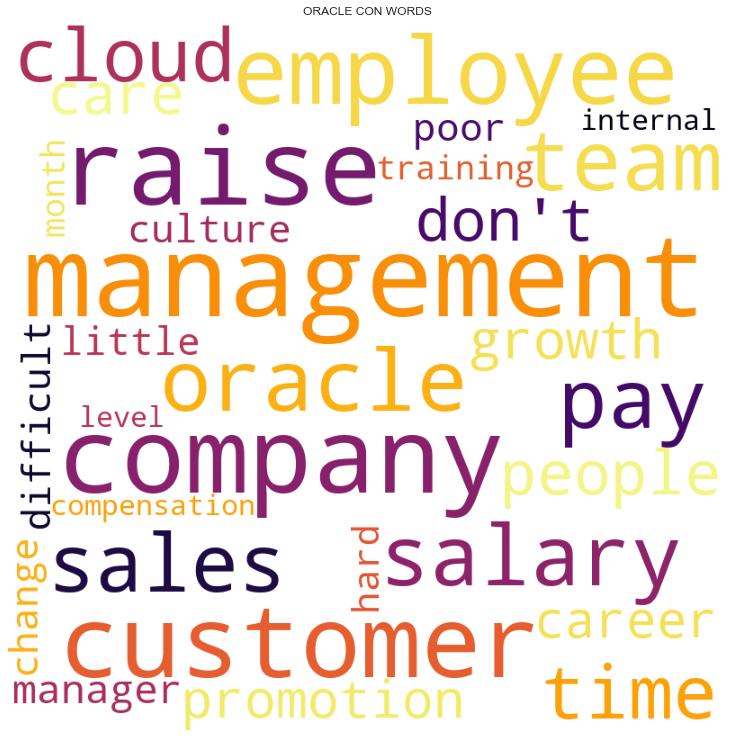

In [111]:
#Google Cons Word Cloud
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(oraclecons_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('ORACLE CON WORDS')
 
plt.show()

<Figure size 720x720 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'IBM CON WORDS')

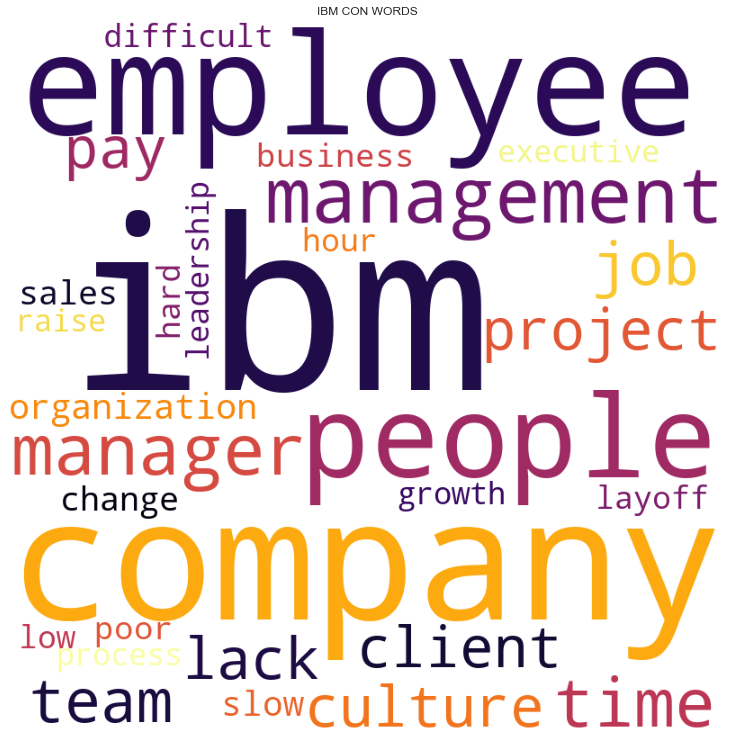

In [112]:
#Oracle CONS Word Cloud
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(ibmcons_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('IBM CON WORDS')
 
plt.show()

<Figure size 720x720 with 0 Axes>

(-0.5, 799.5, 799.5, -0.5)

Text(0.5, 1.0, 'GOOGLE CON WORDS')

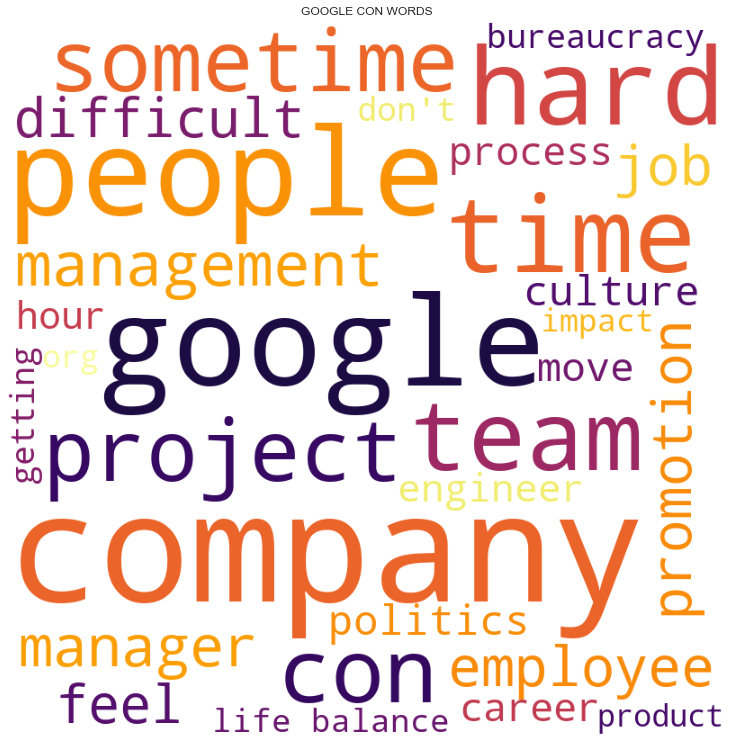

In [113]:
#IBM CONS WordCloud
# plot the WordCloud for IBM image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(googlecons_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('GOOGLE CON WORDS')
 
plt.show()

## Overall, we notice that IBM's word cloud contains the word "compensation, lack, growth, low, slow" which are not seen in the other word cons list. Oracle's word cloud contains "training, salary, and raise" that are unique. Google contains "engineer, hours, impact, feel, move, etc."

# Managerial Recommendation among Big Tech Firms
1. Even as an Analyst or not, the best tech firm would undoubtely be Google. They rank the best among career opportunity, senior management, work life balance, culture values, and company benefits. Even among former employees, Google seems to be the best place to work for as employees are generally happier and satisfied with their roles. IBM and Oracle are the worst to work for as their teams can be slow, inefficient, and pay salary may not fairly compensate the work you can output. 

2. We can recommend IBM and Oracle to implement more work life balance and networking events to help strengthen the community involvement and relationships between coworkers. From our analysis, we believe these bigger companies tend to take longer with their approval and reviewal processes and make their employees confused and left in the dark. With these networking events to have exchanges between different departments, there can be an increase of understanding between employees to see the purpose of a certain task to be done in order.

3. Our team recommends Oracle to create frequent employee evaluations to identify the areas to improve and  career development trainings to help guide employees to grow into stronger employees. From the value counts, we find that most employees find that Oracle does not offer trainings to teach their employees to grow into bigger roles at the company. The pay and compensation might possibly be better at a managerial level, but if employees don't feel important and management does not give them attention, employees will leave quickly. Oracle must make a swift recovery by initiating teams that listen to employee feedback and act on their words. 

## 5.3 What affects the overall rating among Big Four accounting firms?

In [114]:
# create the big four accounting firms with pwc,kpmg,deloitte and ey
accounting = df[(df.firm == 'pwc')|(df.firm == 'kpmg')|(df.firm == 'deloitte')|(df.firm == 'ey')]

In [115]:
# create dummy variables that high_rating that the overall_rating is euqal or larger than 4.
accounting['high_rating'] = (accounting.overall_rating >= 4) * 1.0
accounting.head(2)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
347436,ey,2021-06-05,analyst,"Current Employee, more than 1 year",mumbai,1,1.0,1.0,1.0,1.0,1.0,-1,-1,1,worst company u can work for,"nothing, \r\nno pros \r\njust cons\r\nkind of ...",worst management \r\nno perks\r\novertime\r\no...,0.0,1.0
347438,ey,2021-06-05,senior consultant,"Current Employee, more than 1 year",bangalore,4,4.0,4.0,4.0,4.0,4.0,1,1,1,good to work,nothing new work culture is good,i didn't find anything all good,1.0,1.0


In [116]:
len(accounting)

102837

In [117]:
len(accounting)/len(df)

0.16133597109548187

The accounting subset accounts for 16% of the data.

### Decision Tree.

In [118]:
df_dt = accounting.copy()

In [119]:
df_dt.overall_rating.mean()

3.734278518432082

In [120]:
df_dt.head(2)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
347436,ey,2021-06-05,analyst,"Current Employee, more than 1 year",mumbai,1,1.0,1.0,1.0,1.0,1.0,-1,-1,1,worst company u can work for,"nothing, \r\nno pros \r\njust cons\r\nkind of ...",worst management \r\nno perks\r\novertime\r\no...,0.0,1.0
347438,ey,2021-06-05,senior consultant,"Current Employee, more than 1 year",bangalore,4,4.0,4.0,4.0,4.0,4.0,1,1,1,good to work,nothing new work culture is good,i didn't find anything all good,1.0,1.0


In [121]:
df_dt.drop('date_review', axis=1, inplace=True)
df_dt.drop('job_title', axis=1, inplace=True)
df_dt.drop('location', axis=1, inplace=True)
df_dt.drop('overall_rating', axis=1, inplace=True)
df_dt.drop('headline', axis=1, inplace=True)
df_dt.drop('pros', axis=1, inplace=True)
df_dt.drop('cons', axis=1, inplace=True)
df_dt.drop('recommend', axis=1, inplace=True)
df_dt.drop('ceo_approv', axis=1, inplace=True)
df_dt.drop('outlook', axis=1, inplace=True)

In [122]:
df_dt.head(2)

,firm,work_status,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,high_rating,work_status1
347436,ey,"Current Employee, more than 1 year",1.0,1.0,1.0,1.0,1.0,0.0,1.0
347438,ey,"Current Employee, more than 1 year",4.0,4.0,4.0,4.0,4.0,1.0,1.0


In [123]:
df_dt.work_status.unique()

array(['Current Employee, more than 1 year',
       'Current Employee, less than 1 year',
       'Former Employee, more than 5 years',
       'Current Employee, more than 5 years', 'Current Employee',
       'Former Employee, less than 1 year',
       'Former Employee, more than 1 year', 'Former Employee',
       'Current Employee, more than 3 years',
       'Former Employee, more than 3 years',
       'Current Employee, more than 10 years',
       'Former Employee, more than 8 years',
       'Current Employee, more than 8 years',
       'Former Employee, more than 10 years'], dtype=object)

In [124]:
df_dt = pd.get_dummies(df_dt, columns=['firm','work_status'])

In [125]:
len(df_dt)
df_dt.head(1)

102837

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,high_rating,work_status1,firm_deloitte,firm_ey,firm_kpmg,...,"work_status_Current Employee, more than 3 years","work_status_Current Employee, more than 5 years","work_status_Current Employee, more than 8 years",work_status_Former Employee,"work_status_Former Employee, less than 1 year","work_status_Former Employee, more than 1 year","work_status_Former Employee, more than 10 years","work_status_Former Employee, more than 3 years","work_status_Former Employee, more than 5 years","work_status_Former Employee, more than 8 years"
347436,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
# Create X and Y for Decision Tree Classifier
X = df_dt.drop('high_rating',axis=1)
Y = df_dt.high_rating

In [127]:
dt = tree.DecisionTreeClassifier(max_depth=4)

dt.fit(X,Y)

DecisionTreeClassifier(max_depth=4)

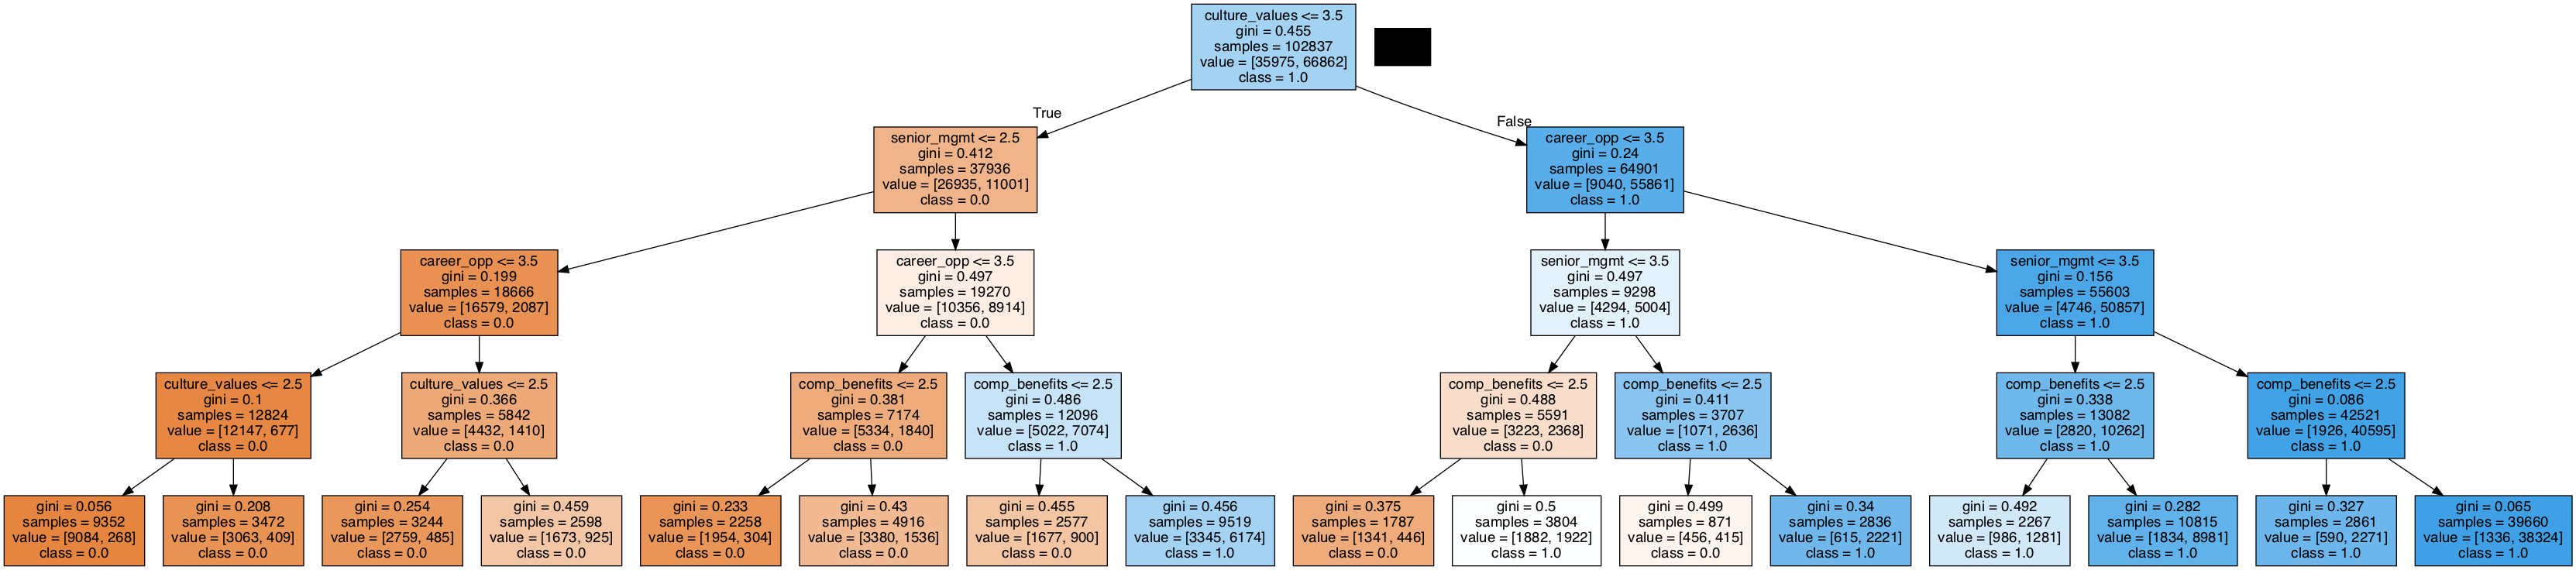

In [128]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# Interpretation
### When the company has "high culture values" and "high career opportunities", no matter the company benefits are high or low, it is likely that the company will have a high overall rating. 
### When the company has "high culture values", even if their career opportunities are low, the company will have a high overall rating once their "senior management" and "company benefits" are high.
### We conclude the most important factors that accounting firms have a high overall rating are "high culture values". So, accounting firms should improve their culture values to have a better overall rating. But they should also care about some important factors such as "career opportunities", "senior management", and "company benefits". 

### Random Forest

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [131]:
# Check the length
len(X)
len(X_train)
len(X_test)
len(X_train) / float (len(X))

102837

71985

30852

0.6999912482861227

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
cl = RandomForestClassifier(random_state = 0)

In [134]:
cl.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [135]:
cl.predict(X_test)

array([1., 1., 1., ..., 1., 1., 1.])

In [136]:
(cl.predict(X_test) == Y_test).mean()

0.8397834824322572

In [137]:
y_pred = cl.predict(X_test)
y_pred[:20]

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1.])

In [138]:
cl.predict_proba(X_test)[:, 1]

array([0.63616667, 1.        , 0.9985741 , ..., 0.60789177, 0.85502468,
       1.        ])

In [139]:
y_pred_proba = cl.predict_proba(X_test)[:, 1]
y_pred_proba[:20]

array([0.63616667, 1.        , 0.9985741 , 0.36407937, 0.86472611,
       0.99055556, 0.97633333, 1.        , 1.        , 0.99464286,
       1.        , 0.15      , 0.60222475, 0.99002374, 0.38416667,
       0.03      , 0.58894444, 0.97345309, 0.98552125, 1.        ])

### Collect Scores

In [140]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[ 8047,  2729],
       [ 2214, 17862]])

In [141]:
# Accuracy
(y_pred == Y_test).mean()

0.8397834824322572

In [142]:
# Precision
import sklearn.metrics as met
met.precision_score(Y_test,y_pred)

0.8674663688019038

In [143]:
Y_test.mean()

0.6507195643718398

In [144]:
# Recall
met.recall_score(Y_test,y_pred)

0.8897190675433353

In [145]:
# AUC score
met.roc_auc_score(Y_test,y_pred_proba)

0.9047960641174524

### The AUC score is pretty high. (90%)

### Cross-validation

In [146]:
from sklearn.model_selection import KFold
nfolds = 10
kf = KFold(n_splits = nfolds, random_state = 2, shuffle = True)

In [147]:
sk.model_selection.cross_val_score(cl, X, Y, cv=kf, n_jobs = -1, scoring = 'roc_auc') #.mean()

array([0.90880529, 0.90649632, 0.91106   , 0.91242556, 0.90993278,
       0.90230249, 0.90639717, 0.90970286, 0.91275363, 0.90886685])

which one is better?

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier()]

In [149]:
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,Y,cv=kf,n_jobs=-1,scoring='roc_auc').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.8525924830433048
RandomForestClassifier(n_jobs=-1) 0.908942358126421
GaussianNB() 0.897570316058298


/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

LogisticRegression(n_jobs=-1) 0.9257446799610545
DecisionTreeClassifier() 0.8524396226672009
AdaBoostClassifier() 0.9276176753535232


/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/NaomiWong/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Varia

QuadraticDiscriminantAnalysis() 0.8528303130505919
MLPClassifier() 0.9274875823054263
***********************************************
Best is... AdaBoostClassifier() 0.9276176753535232


### The best classifier is AdaBoostClassifier.

### Clustering

In [150]:
df_clus = accounting.copy()

In [151]:
df_clus.head(3)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
347436,ey,2021-06-05,analyst,"Current Employee, more than 1 year",mumbai,1,1.0,1.0,1.0,1.0,1.0,-1,-1,1,worst company u can work for,"nothing, \r\nno pros \r\njust cons\r\nkind of ...",worst management \r\nno perks\r\novertime\r\no...,0.0,1.0
347438,ey,2021-06-05,senior consultant,"Current Employee, more than 1 year",bangalore,4,4.0,4.0,4.0,4.0,4.0,1,1,1,good to work,nothing new work culture is good,i didn't find anything all good,1.0,1.0
347439,ey,2021-06-05,stocker,"Current Employee, less than 1 year",ala,1,2.0,1.0,1.0,1.0,1.0,-1,1,0,boring,working around people and being friendly,working around rude people all the time,0.0,1.0


In [152]:
len(df_clus)

102837

In [153]:
# Drop columns that contain duplicated or unnecessary information
df_clus.drop('firm', axis=1, inplace=True)
df_clus.drop('date_review', axis=1, inplace=True)
df_clus.drop('job_title', axis=1, inplace=True)
df_clus.drop('work_status', axis=1, inplace=True)
df_clus.drop('location', axis=1, inplace=True)
df_clus.drop('headline', axis=1, inplace=True)
df_clus.drop('pros', axis=1, inplace=True)
df_clus.drop('cons', axis=1, inplace=True)
df_clus.drop('high_rating', axis = 1, inplace = True)

In [154]:
df_clus.dtypes

overall_rating         int64
work_life_balance    float64
culture_values       float64
career_opp           float64
comp_benefits        float64
senior_mgmt          float64
recommend              int64
ceo_approv             int64
outlook                int64
work_status1         float64
dtype: object

### Use KMeans to find 3 clusters

In [155]:
from sklearn.cluster import KMeans

In [156]:
df_clus.head(2)

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,work_status1
347436,1,1.0,1.0,1.0,1.0,1.0,-1,-1,1,1.0
347438,4,4.0,4.0,4.0,4.0,4.0,1,1,1,1.0


In [157]:
clu = KMeans(n_clusters=3, random_state=0)

In [158]:
type(clu)

sklearn.cluster._kmeans.KMeans

In [159]:
clu

KMeans(n_clusters=3, random_state=0)

In [160]:
clu.fit(df_clus)

KMeans(n_clusters=3, random_state=0)

In [161]:
clu.labels_

array([0, 2, 0, ..., 2, 2, 2], dtype=int32)

### Getting summary information on the clusters' characteristics

In [162]:
df_clus['cluster']= clu.labels_

In [163]:
df_clus.head()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,work_status1,cluster
347436,1,1.0,1.0,1.0,1.0,1.0,-1,-1,1,1.0,0
347438,4,4.0,4.0,4.0,4.0,4.0,1,1,1,1.0,2
347439,1,2.0,1.0,1.0,1.0,1.0,-1,1,0,1.0,0
347440,4,2.0,5.0,4.0,2.0,3.0,1,0,1,1.0,1
347441,3,3.0,3.0,4.0,3.0,2.0,1,0,0,0.0,1


In [164]:
df_clus.groupby('cluster').mean()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,work_status1
cluster,,,,,,,,,,
0,2.184459,1.692496,1.956234,2.625434,2.288988,1.678052,-0.666974,-0.046536,-0.148729,0.534807
1,3.653276,2.410195,3.614097,3.913951,3.101229,3.177084,0.546837,0.287786,0.415473,0.643577
2,4.535873,3.853590,4.634236,4.547897,4.032106,4.328020,0.826922,0.555456,0.704860,0.689318


In [165]:
df_clus['low_culture_values']= pd.cut(df_clus.culture_values, bins=[0,2,3,4,5])

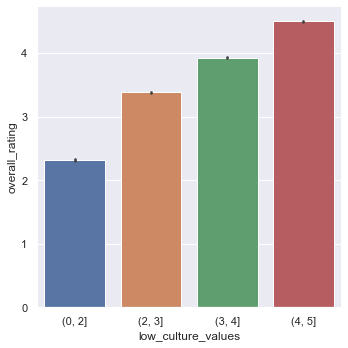

In [166]:
sns.catplot(x='low_culture_values',y='overall_rating',data=df_clus, kind='bar')

In [167]:
df_clus['low_senior_mgmt']= pd.cut(df_clus.senior_mgmt, bins=[0,2,3,4,5])

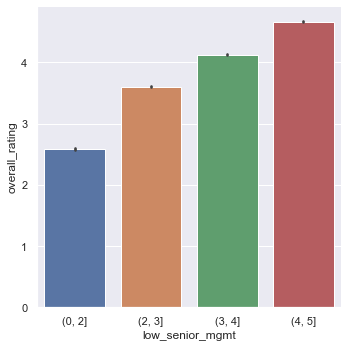

In [168]:
sns.catplot(x='low_senior_mgmt',y='overall_rating',data=df_clus, kind='bar')

### According to the bar chart, if the accounting firms' culture values or senior management is lower than 4 (1,2,3), then their overall rating would lower than 4.

In [169]:
df_clus['low_comp_benefits']= pd.cut(df_clus.comp_benefits, bins=[0,2,3,4,5])

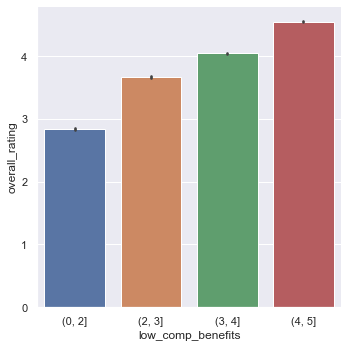

In [170]:
sns.catplot(x='low_comp_benefits',y='overall_rating',data=df_clus, kind='bar')

In [171]:
corr = df_clus.corr()
corr

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,work_status1,cluster
overall_rating,1.000000,0.515400,0.718681,0.656646,0.542560,0.708244,0.597947,0.364631,0.462032,0.111426,0.781724
work_life_balance,0.515400,1.000000,0.513663,0.279002,0.396459,0.502584,0.364408,0.253729,0.268052,0.084756,0.652150
culture_values,0.718681,0.513663,1.000000,0.553477,0.445535,0.718459,0.542410,0.367075,0.417910,0.119635,0.782263
career_opp,0.656646,0.279002,0.553477,1.000000,0.450656,0.593536,0.467971,0.282922,0.398353,0.085566,0.624668
comp_benefits,0.542560,0.396459,0.445535,0.450656,1.000000,0.467956,0.355966,0.269240,0.300765,0.022277,0.582139
senior_mgmt,0.708244,0.502584,0.718459,0.593536,0.467956,1.000000,0.514695,0.360730,0.427867,0.102132,0.787391
recommend,0.597947,0.364408,0.542410,0.467971,0.355966,0.514695,1.000000,0.407786,0.548878,0.095013,0.618378
ceo_approv,0.364631,0.253729,0.367075,0.282922,0.269240,0.360730,0.407786,1.000000,0.446485,0.104580,0.394760
outlook,0.462032,0.268052,0.417910,0.398353,0.300765,0.427867,0.548878,0.446485,1.000000,0.108847,0.473150
work_status1,0.111426,0.084756,0.119635,0.085566,0.022277,0.102132,0.095013,0.104580,0.108847,1.000000,0.108453


<AxesSubplot:>

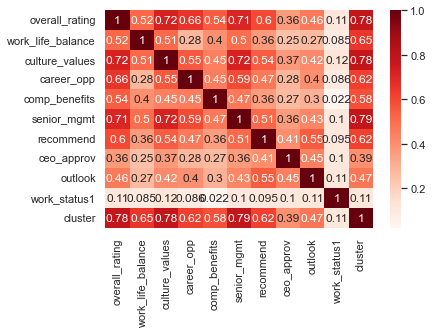

In [172]:
sns.heatmap(corr, annot=True, cmap='Reds')

### According to the heatmap, among these Big4 accounting firms, "culture values", "senior management", and "career opportunities" are highly positive correlated to the overall rating. Our decision tree also used these variables to classify high rating and low rating.

### We also observed that culture values is also highly correlated to the senior management. This indicates that the accounting firms will have a better culture values with good senior management

## Lotus Decision Tree

In [173]:
df3 = df.copy()

In [174]:
dt = tree.DecisionTreeClassifier(max_depth=3)

In [175]:
df3['high_rating'] = (df3.overall_rating >= 4) * 1.0
df3.head(2)

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,don't do it,people in leadership roles have been there for...,pressure to do whatever the leaders want\r\nno...,0.0,0.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,4.0,0,0,0,international auction house,"great exposure, respectful environment and bea...",ot during peak seasons and often underpaid,1.0,0.0


In [176]:
df3.head()

,firm,date_review,job_title,work_status,location,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,high_rating,work_status1
1,sotheby-s,2021-05-25,financial analyst,"Former Employee, more than 1 year","new york, ny",1,1.0,1.0,1.0,2.0,1.0,-1,0,-1,don't do it,people in leadership roles have been there for...,pressure to do whatever the leaders want\r\nno...,0.0,0.0
2,sotheby-s,2021-05-25,administrator,Former Employee,hong kong,4,4.0,5.0,3.0,4.0,4.0,0,0,0,international auction house,"great exposure, respectful environment and bea...",ot during peak seasons and often underpaid,1.0,0.0
3,sotheby-s,2021-05-24,client services representative,"Former Employee, more than 1 year","london, england, england",4,5.0,4.0,5.0,4.0,5.0,1,1,1,"fast-paced, difficult and rewarding","good team, support and training",high-stress with relatively low conpensation,1.0,0.0
4,sotheby-s,2021-05-22,anonymous employee,Current Employee,hong kong,3,2.0,2.0,3.0,2.0,3.0,0,0,0,review,"exposure to artworks, great team of specialists","work life balance, company culture",0.0,1.0
5,sotheby-s,2021-05-15,administrator,"Current Employee, less than 1 year","london, england, england",4,4.0,4.0,3.0,3.0,3.0,1,0,1,fun job and nice people but huge workload and ...,"fantastic art, nice enthusiastic people and a ...",very low pay and huge workload,1.0,1.0


In [177]:
df_dt =df3.drop(columns = ['firm','date_review','job_title','work_status','location',\
                           'headline','pros','cons','work_status1',\
                          'recommend','ceo_approv','outlook','overall_rating'])
df_dt.head()

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,high_rating
1,1.0,1.0,1.0,2.0,1.0,0.0
2,4.0,5.0,3.0,4.0,4.0,1.0
3,5.0,4.0,5.0,4.0,5.0,1.0
4,2.0,2.0,3.0,2.0,3.0,0.0
5,4.0,4.0,3.0,3.0,3.0,1.0


In [178]:
df_dt.groupby('high_rating')['high_rating'].count()

high_rating
0.0    251866
1.0    385543
Name: high_rating, dtype: int64

In [179]:
X = df_dt.drop(columns='high_rating')
Y = df_dt.high_rating

In [180]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

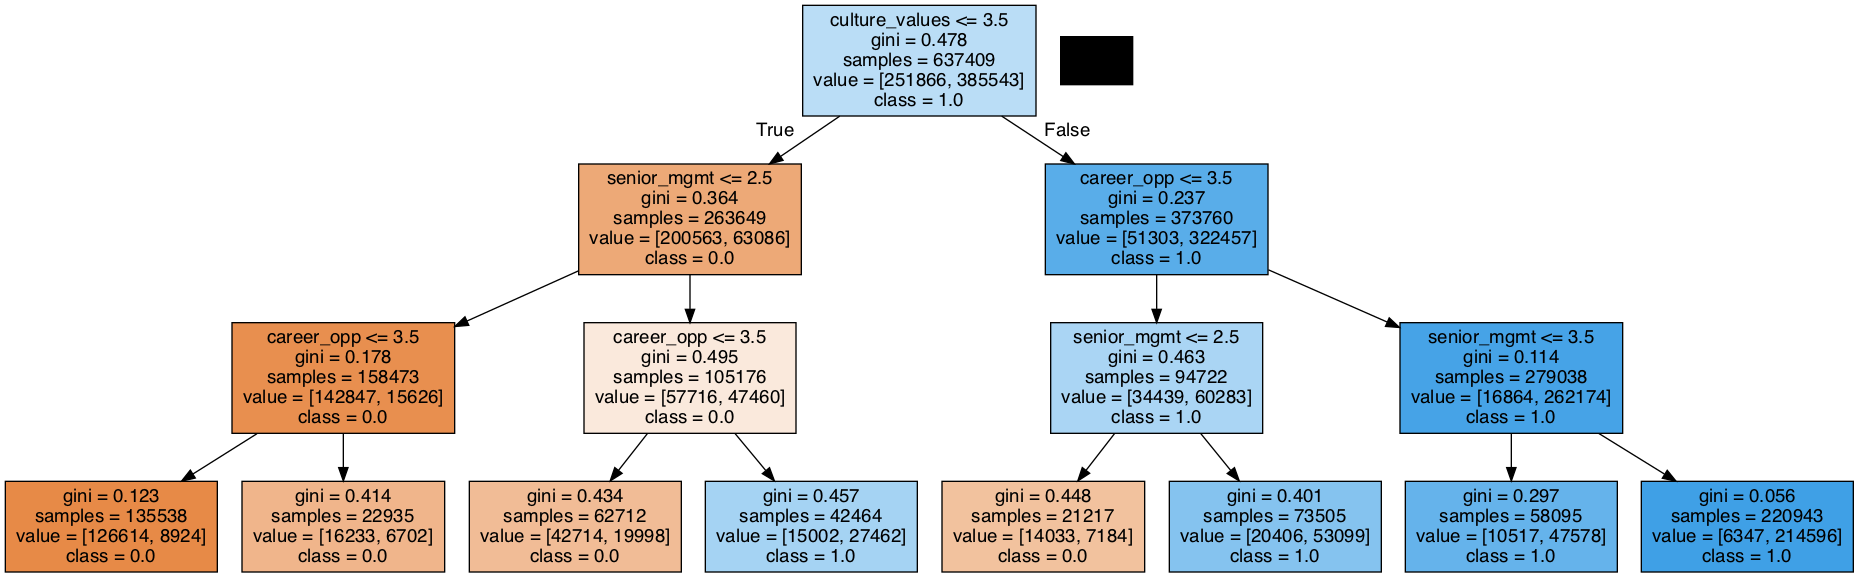

In [181]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Conclusion: 
### 1. Cuture values and Career opportunity have the most positive effect on overall_rating.
### 2. When the culture values and career opportunity scores are very high, senior management have negative effect on overall_rating, under those condition, the higher the senior management score is, the lower the overall_rating would be. Company benifits does have any effect on overall_rating.

## 6.3 Validating the findings

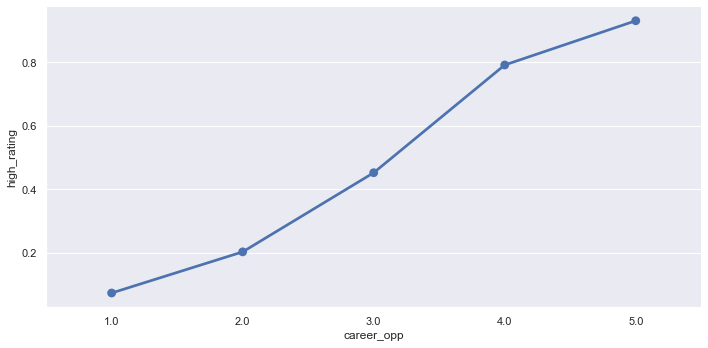

In [182]:
# check if career_opp has positive effect on overall_rating
sns.catplot(x='career_opp', y= 'high_rating', kind= 'point', data=df3, aspect=2)

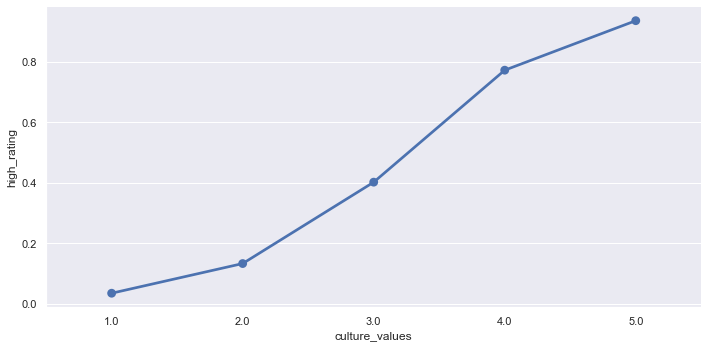

In [183]:
# check if culture_values has positive effect on overall_rating
sns.catplot(x='culture_values', y= 'high_rating', kind= 'point', data=df3, aspect=2)

## 6.4 Random forest

In [184]:
from sklearn.model_selection import train_test_split
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [185]:
# Check the length
len(X)
len(X_train)
len(X_test)
len(X_train) / float (len(X))

637409

446186

191223

0.699999529344581

In [186]:
(len(X_train) + len(X_test)) == len(X)

True

In [187]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(random_state = 0)

cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

### Predict the test set

In [188]:
cl.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [189]:
(cl.predict(X_test) == Y_test).mean()

0.8653247778771382

In [190]:
y_pred = cl.predict(X_test)

In [191]:
y_pred[:20]

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1.])

In [192]:
cl.predict_proba(X_test)

array([[0.8517417 , 0.1482583 ],
       [0.9878449 , 0.0121551 ],
       [0.7298588 , 0.2701412 ],
       ...,
       [0.86591108, 0.13408892],
       [0.87945452, 0.12054548],
       [0.42148612, 0.57851388]])

In [193]:
y_pred_proba = cl.predict_proba(X_test)[:,1]
y_pred_proba[:20]

array([0.1482583 , 0.0121551 , 0.2701412 , 0.99464674, 0.93373493,
       0.02746466, 0.97507051, 0.09414175, 0.99227624, 0.65016508,
       0.98942457, 0.97251969, 0.60239478, 0.99227624, 0.99578374,
       0.34423145, 0.19815538, 0.96462857, 0.99285296, 0.89418377])

Collect Scores

In [194]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [195]:
# Confusion matrix
confusion_matrix(Y_test,y_pred)

array([[ 62284,  13118],
       [ 12635, 103186]])

In [196]:
# Accuracy
(y_pred == Y_test).mean()
met.accuracy_score(Y_test, y_pred)
Y_test.mean()

0.8653247778771382

0.8653247778771382

0.6056855085423825

In [197]:
# Precision
met.precision_score(Y_test,y_pred,average='micro')

0.8653247778771382

In [198]:
# Recall
met.recall_score(Y_test,y_pred,average='micro')

0.8653247778771382

In [199]:
# AUC score
met.roc_auc_score(Y_test,y_pred_proba,max_fpr=None)

0.9387788509591672

## 6. Interesting Findings:

<b>Finding 1:</b> The most commonly used words in the pros and cons of a company are related to the people, manager, work life balance, and staff. 

For pros specifically, the word opportunity is often used whereas the cons mention time and hour the most.

<b>Finding 2:</b>

<b>Finding 3:</b>

## 7. Conclusions:

<li> Creating an environment that has good people and a good work life balance is key. Management should focus heavily on HR, recruiting, and resource planning as these areas are often mentioned in the pros and cons of a firm.
</li>
<li> Offer employees ample opportunities for learning and career growth. This can help improve job satisfaction as it is a commonly used word to describe the pros of the company.  </li>